In [2]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math
import matplotlib as mpl

In [109]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br
0,S1,1547044.37,0.000000e+00,1516317.328,3.063362e+06,8.383210e+05,0.000000e+00,1515863.357,2.354184e+06
1,S2,1547044.37,0.000000e+00,1516317.328,3.063362e+06,1.299831e+07,8.567154e+05,1515863.357,1.537089e+07
2,S3,1547044.37,0.000000e+00,1516317.328,3.063362e+06,3.022004e+07,2.539788e+06,1515863.357,3.427569e+07
3,S4,13417867.17,8.567154e+05,2294161.761,1.656874e+07,8.383210e+05,0.000000e+00,1515863.357,2.354184e+06
4,S5,30695716.06,2.539788e+06,3847471.406,3.708298e+07,8.383210e+05,0.000000e+00,1515863.357,2.354184e+06
5,S6,13692982.44,8.567154e+05,2294161.761,1.684386e+07,3.994539e+06,8.567154e+05,1515863.357,6.367118e+06
6,S7,13417867.17,8.567154e+05,2294161.761,1.656874e+07,1.299831e+07,8.567154e+05,1515863.357,1.537089e+07
7,S8,13692982.44,8.567154e+05,2294161.761,1.684386e+07,1.976700e+06,8.567154e+05,1515863.357,4.349279e+06
8,S9,13417867.17,8.567154e+05,2294161.761,1.656874e+07,5.791744e+06,8.567154e+05,1515863.357,8.164323e+06
9,S10,31348271.48,2.539788e+06,3847471.406,3.773553e+07,8.863683e+06,2.539788e+06,1515863.357,1.291933e+07


In [110]:
df_cost = df_cost.set_index('Strategy')

In [111]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br'], axis=1)

In [112]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1547044.37,0.000000e+00,1516317.328,8.383210e+05,0.000000e+00,1515863.357
S2,1547044.37,0.000000e+00,1516317.328,1.299831e+07,8.567154e+05,1515863.357
S3,1547044.37,0.000000e+00,1516317.328,3.022004e+07,2.539788e+06,1515863.357
S4,13417867.17,8.567154e+05,2294161.761,8.383210e+05,0.000000e+00,1515863.357
S5,30695716.06,2.539788e+06,3847471.406,8.383210e+05,0.000000e+00,1515863.357
S6,13692982.44,8.567154e+05,2294161.761,3.994539e+06,8.567154e+05,1515863.357
S7,13417867.17,8.567154e+05,2294161.761,1.299831e+07,8.567154e+05,1515863.357
S8,13692982.44,8.567154e+05,2294161.761,1.976700e+06,8.567154e+05,1515863.357
S9,13417867.17,8.567154e+05,2294161.761,5.791744e+06,8.567154e+05,1515863.357


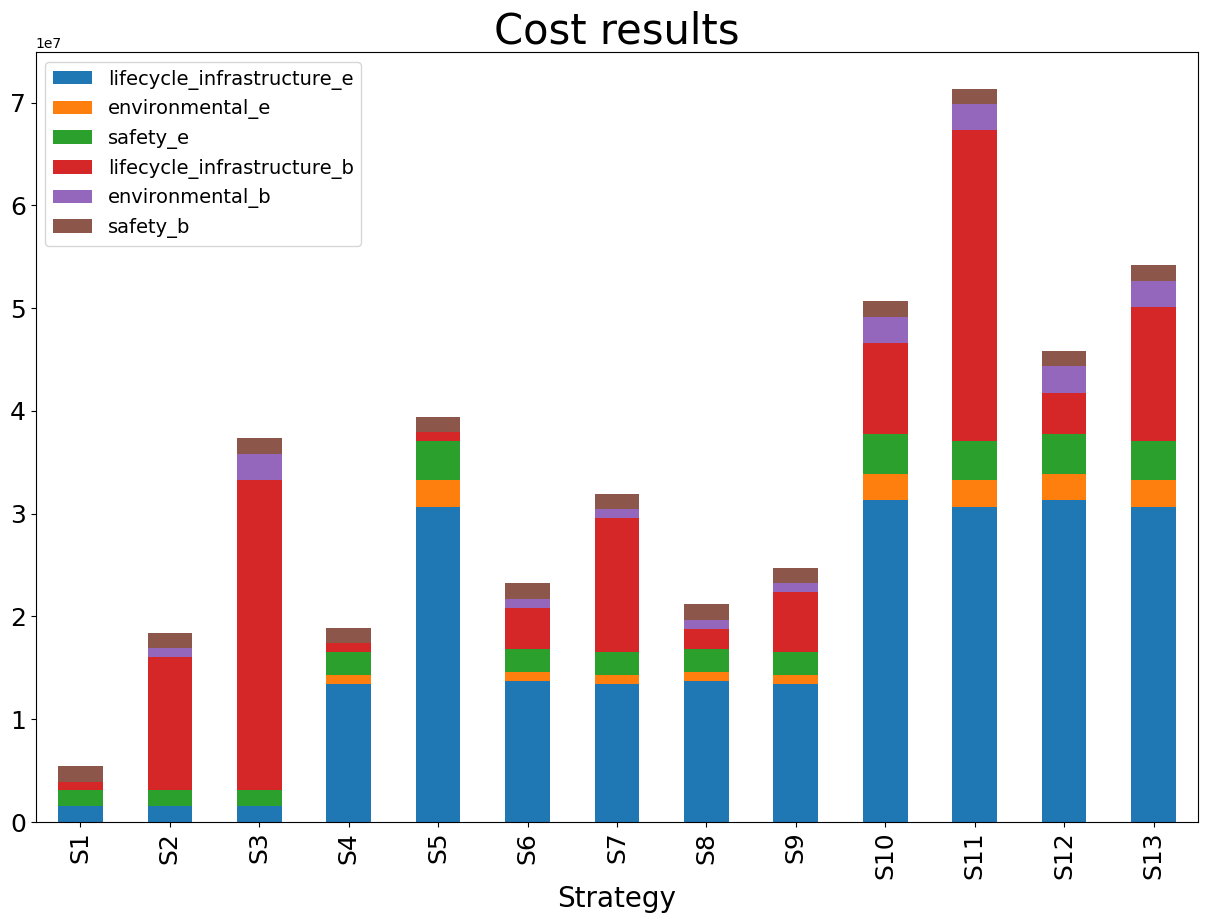

In [113]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

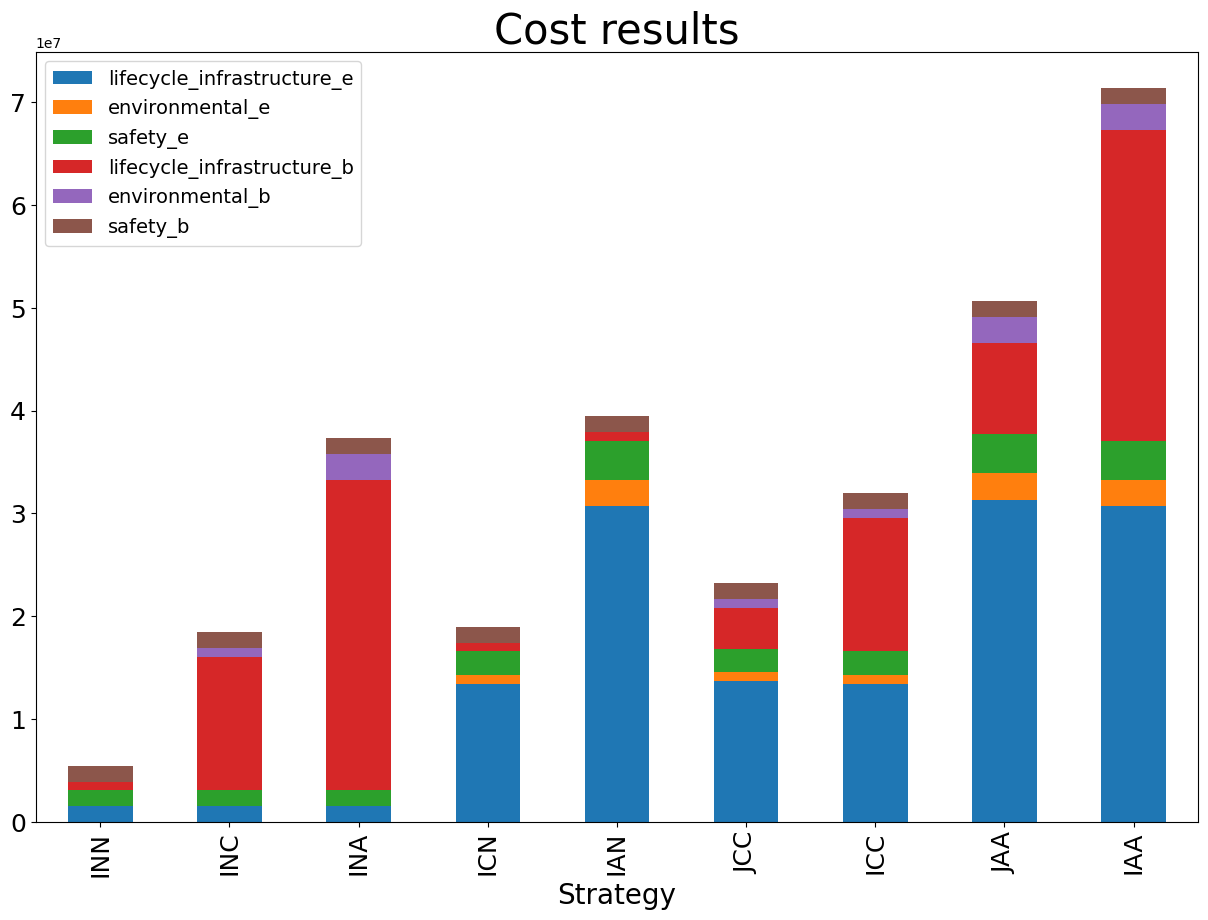

In [114]:
# Filter out the unwanted rows and rename the strategies according to the given mapping
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

df_cost_filtered =df_cost.drop(['S8', 'S9', 'S12', 'S13'])
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# plotting cost results
df_cost_filtered.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-modified.png')

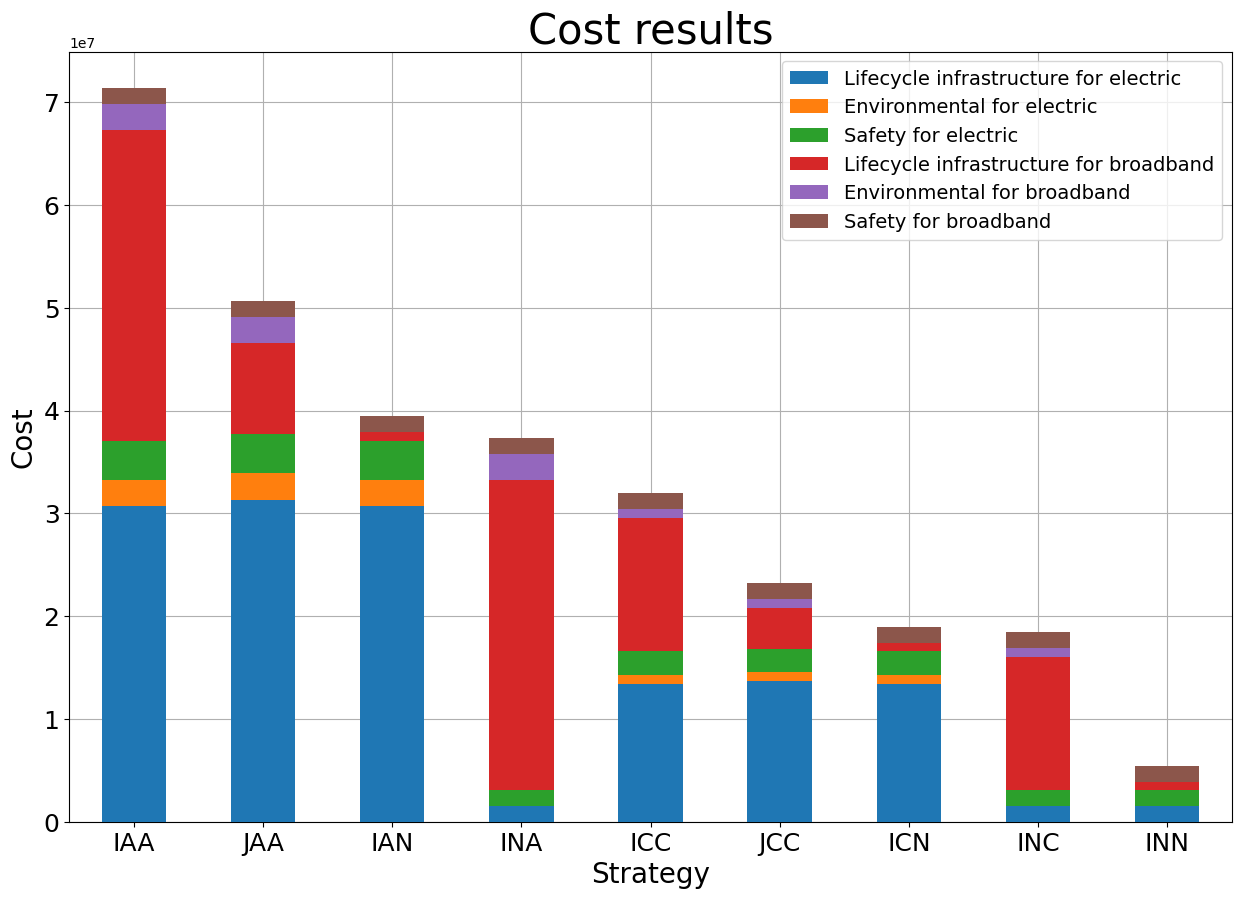

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cost is already defined and loaded with data
# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_cost_filtered = df_cost.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# Sort dataframe by the sum of the rows from highest to lowest
df_cost_sorted = df_cost_filtered.sum(axis=1).sort_values(ascending=False).index
df_cost_filtered = df_cost_filtered.loc[df_cost_sorted]

# Plotting cost results
ax = df_cost_filtered.plot.bar(stacked=True, figsize=(15, 10), zorder=3)  # Set zorder to 3
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy', fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)

plt.grid(zorder=0)  # Ensure grid is behind the bars

# Update the legend
legend_labels = {
    'lifecycle_infrastructure_el': 'Lifecycle infrastructure for electric',
    'environmental_restoration_el': 'Environmental for electric',
    'safety_el': 'Safety for electric',
    'lifecycle_infrastructure_br': 'Lifecycle infrastructure for broadband',
    'environmental_restoration_br': 'Environmental for broadband',
    'safety_br': 'Safety for broadband'
}
plt.legend([legend_labels.get(label, label) for label in df_cost_filtered.columns], fontsize=14)

plt.savefig(r'../../figures/npv-cost-modified.png')
plt.show()


In [116]:
df_cost
#df_cost_filtered

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
S1,1547044.37,0.000000e+00,1516317.328,8.383210e+05,0.000000e+00,1515863.357
S2,1547044.37,0.000000e+00,1516317.328,1.299831e+07,8.567154e+05,1515863.357
S3,1547044.37,0.000000e+00,1516317.328,3.022004e+07,2.539788e+06,1515863.357
S4,13417867.17,8.567154e+05,2294161.761,8.383210e+05,0.000000e+00,1515863.357
S5,30695716.06,2.539788e+06,3847471.406,8.383210e+05,0.000000e+00,1515863.357
S6,13692982.44,8.567154e+05,2294161.761,3.994539e+06,8.567154e+05,1515863.357
S7,13417867.17,8.567154e+05,2294161.761,1.299831e+07,8.567154e+05,1515863.357
S8,13692982.44,8.567154e+05,2294161.761,1.976700e+06,8.567154e+05,1515863.357
S9,13417867.17,8.567154e+05,2294161.761,5.791744e+06,8.567154e+05,1515863.357


In [10]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,S1,0.0000,1.900000e+09,0.000000,1.200000e+09
1,S2,0.0000,1.900000e+09,1903.175339,9.430000e+08
2,S3,0.0000,1.900000e+09,5374.110149,4.370000e+08
3,S4,254367.1932,1.490000e+09,0.000000,1.200000e+09
4,S5,718271.8723,6.920000e+08,0.000000,1.200000e+09
5,S6,254367.1932,1.490000e+09,1903.175339,9.430000e+08
6,S10,718271.8723,6.920000e+08,5374.110149,4.370000e+08


In [11]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [12]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
S1,0.0000,1.900000e+09,0.000000,1.200000e+09
S2,0.0000,1.900000e+09,1903.175339,9.430000e+08
S3,0.0000,1.900000e+09,5374.110149,4.370000e+08
S4,254367.1932,1.490000e+09,0.000000,1.200000e+09
S5,718271.8723,6.920000e+08,0.000000,1.200000e+09
S6,254367.1932,1.490000e+09,1903.175339,9.430000e+08
S10,718271.8723,6.920000e+08,5374.110149,4.370000e+08


In [13]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [14]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
S1,1.900000e+09,1.200000e+09
S2,1.900000e+09,9.430000e+08
S3,1.900000e+09,4.370000e+08
S4,1.490000e+09,1.200000e+09
S5,6.920000e+08,1.200000e+09
S6,1.490000e+09,9.430000e+08
S10,6.920000e+08,4.370000e+08


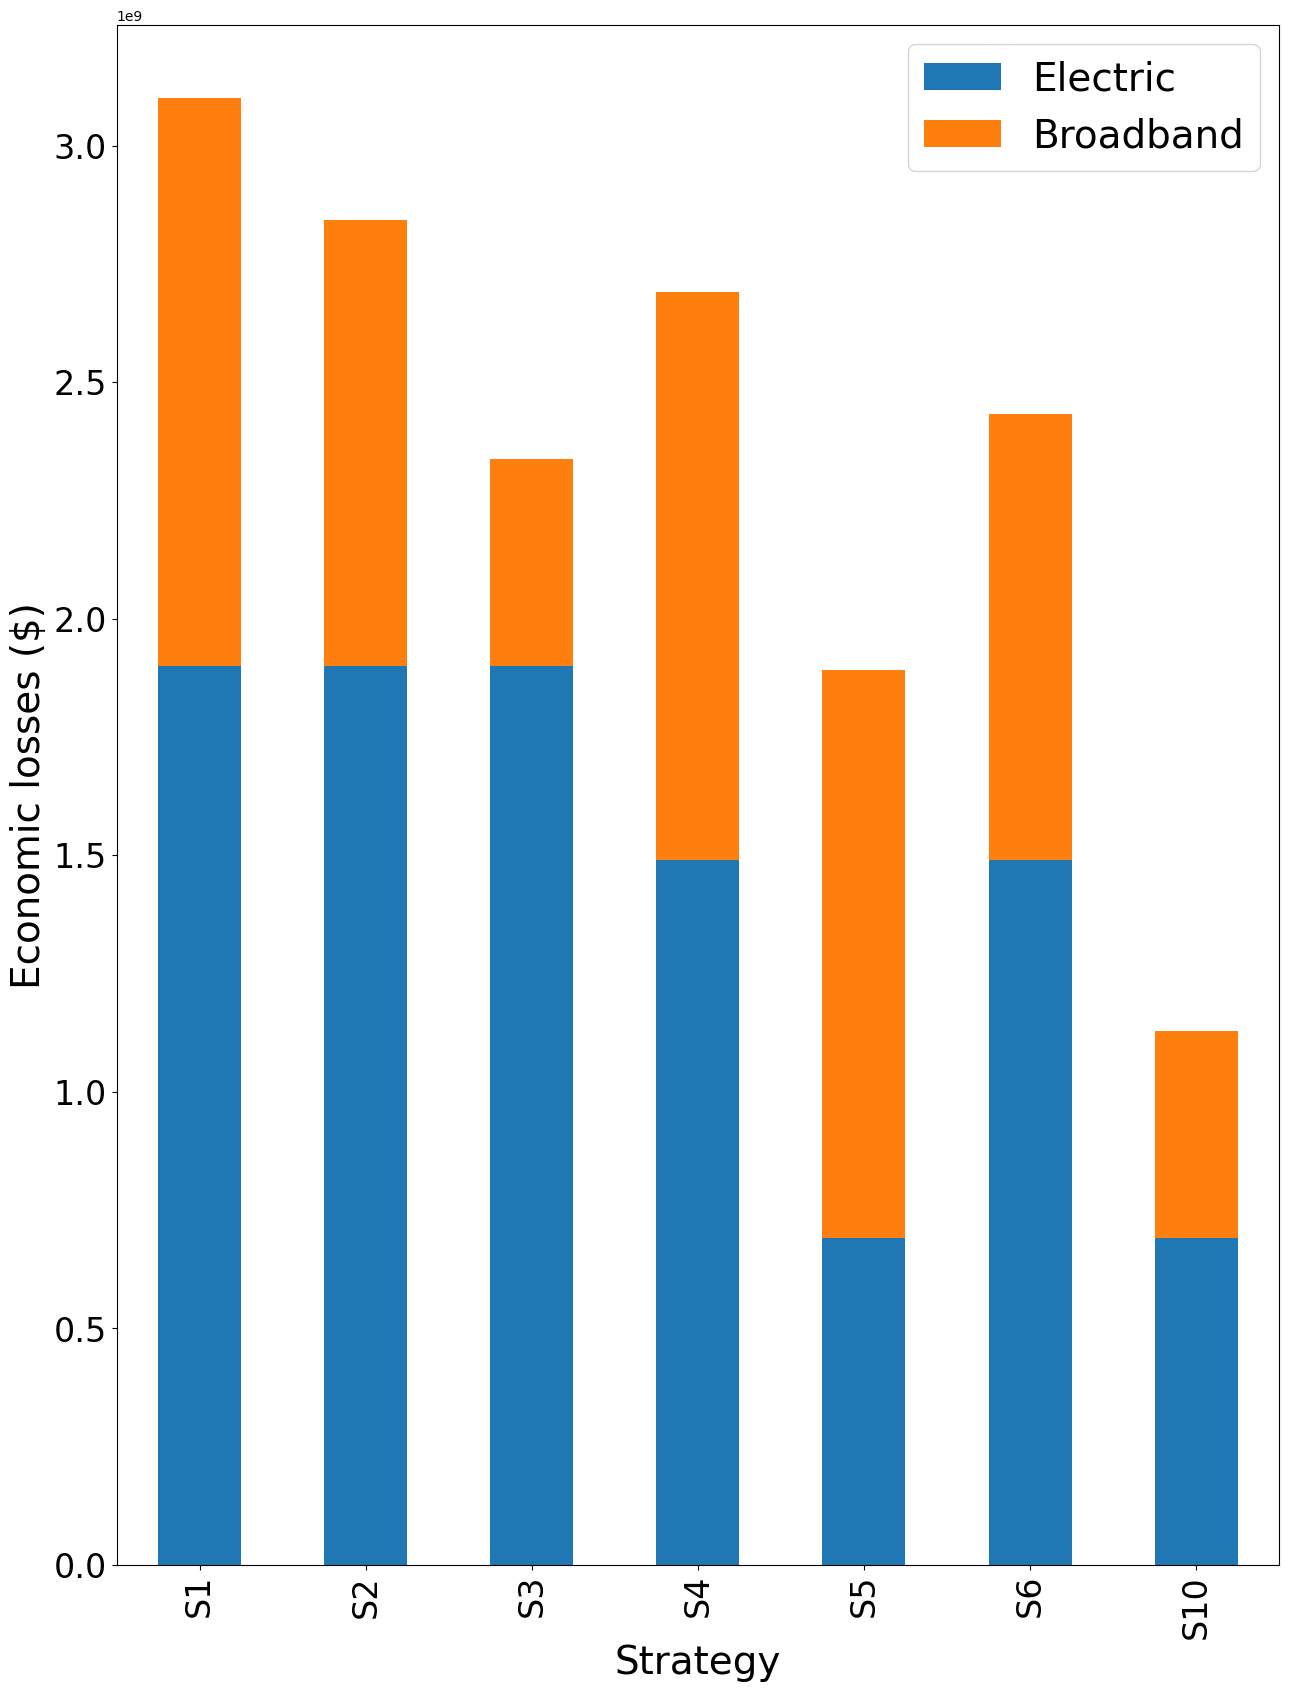

In [16]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Economic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)

In [17]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [18]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
S1,0.0000,0.000000
S2,0.0000,1903.175339
S3,0.0000,5374.110149
S4,254367.1932,0.000000
S5,718271.8723,0.000000
S6,254367.1932,1903.175339
S10,718271.8723,5374.110149


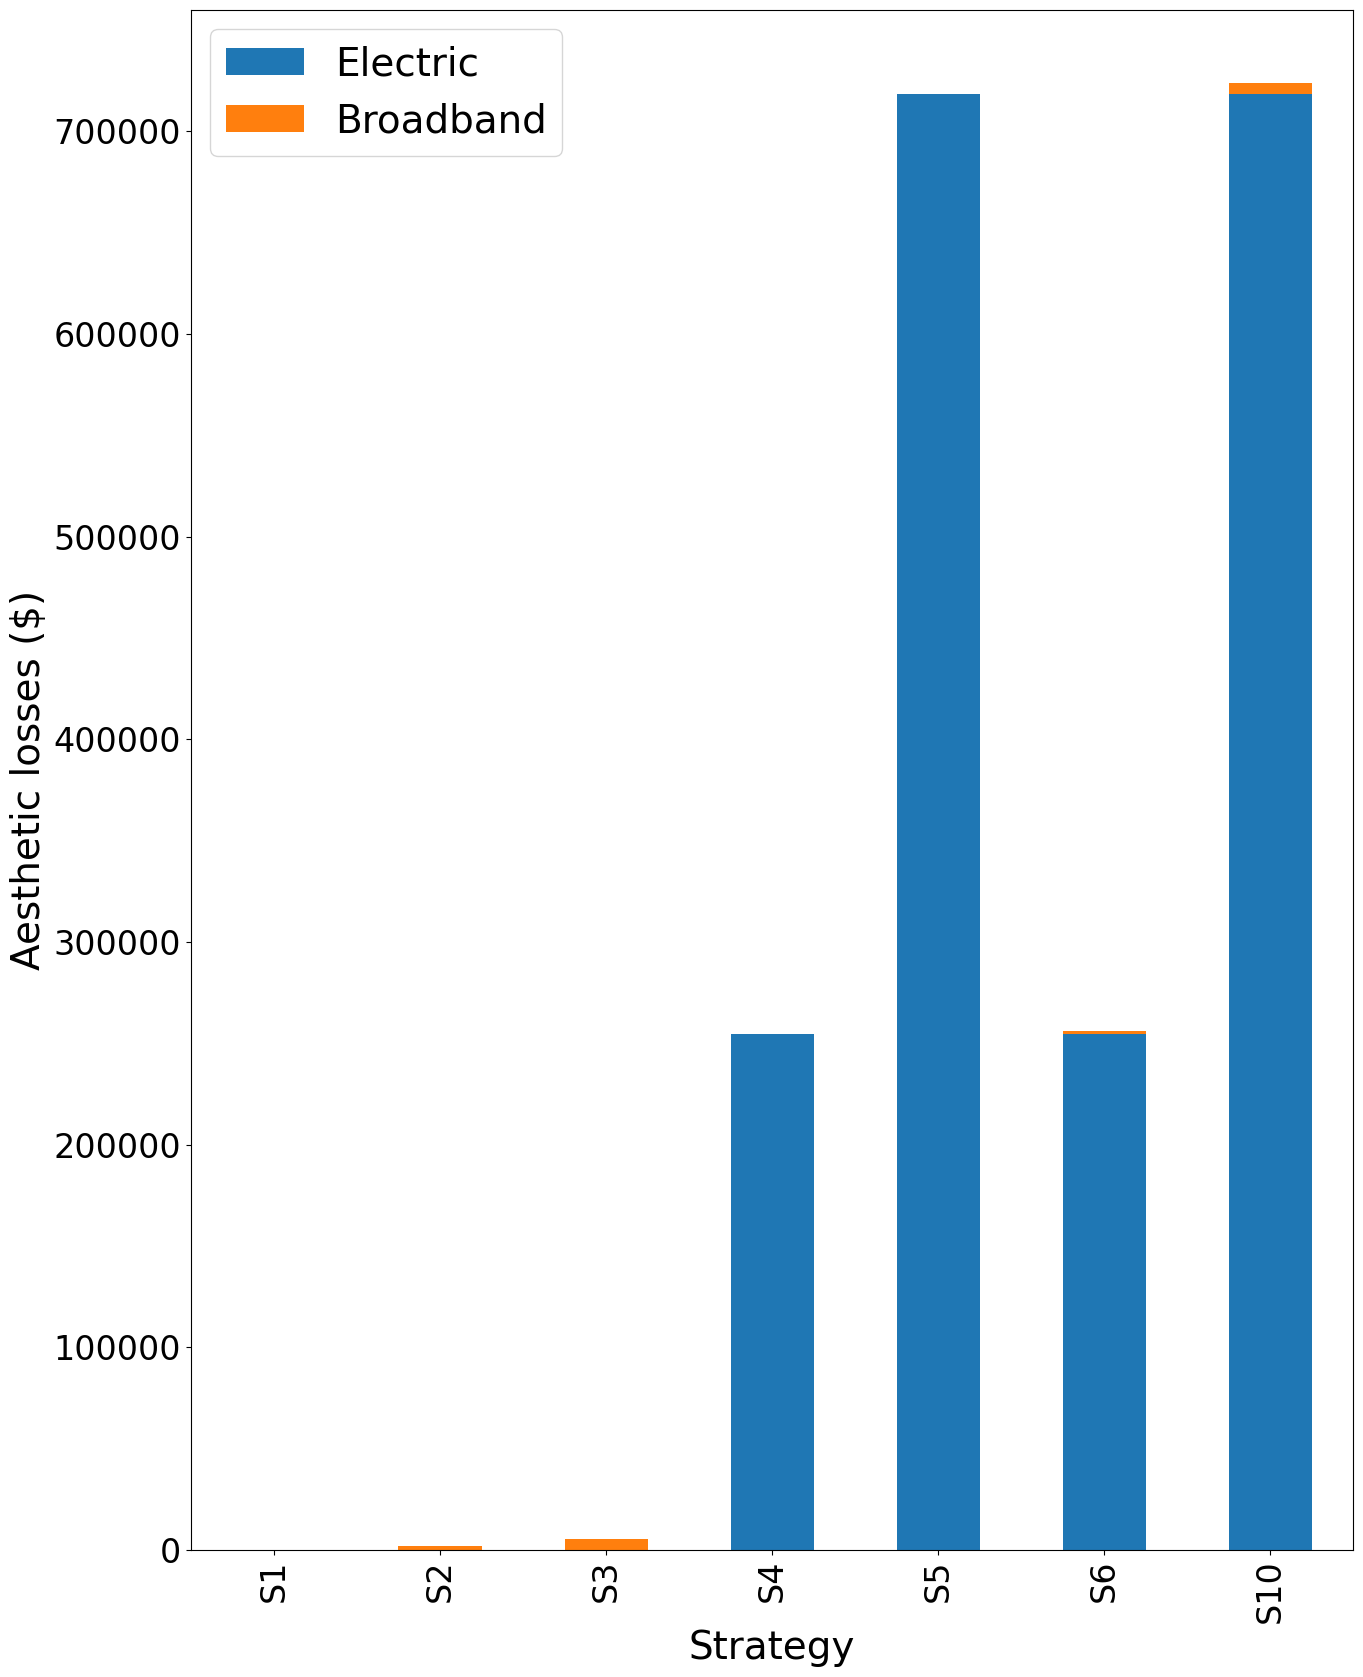

In [19]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Aesthetic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [20]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.0,0.0,-5210000.0
1,INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
2,INA,31800000.0,2.539788e+06,3030000.0,37300000.0,2220.0,0.0,-38000000.0
3,ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,1020.0,322000000.0,303000000.0
4,IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,2220.0,620000000.0,581000000.0
5,JCC,17700000.0,1.713431e+06,3810000.0,23200000.0,2040.0,323000000.0,289000000.0
6,ICC,26400000.0,1.713431e+06,3810000.0,31900000.0,2040.0,323000000.0,287000000.0
7,JAA,40200000.0,5.079576e+06,5360000.0,50700000.0,4440.0,622000000.0,547000000.0
8,IAA,60900000.0,5.079576e+06,5360000.0,71400000.0,4440.0,622000000.0,545000000.0


In [127]:
#df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [128]:
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.0,0.0,-5210000.0
1,INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
2,INA,31800000.0,2.539788e+06,3030000.0,37300000.0,2220.0,0.0,-38000000.0
3,ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,1020.0,322000000.0,303000000.0
4,IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,2220.0,620000000.0,581000000.0
5,JCC,17700000.0,1.713431e+06,3810000.0,23200000.0,2040.0,323000000.0,289000000.0
6,ICC,26400000.0,1.713431e+06,3810000.0,31900000.0,2040.0,323000000.0,287000000.0
7,JAA,40200000.0,5.079576e+06,5360000.0,50700000.0,4440.0,622000000.0,547000000.0
8,IAA,60900000.0,5.079576e+06,5360000.0,71400000.0,4440.0,622000000.0,545000000.0


In [129]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [130]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [131]:
df_npv_net_benefit_new=df_npv_net_benefit.transpose()

In [132]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-5210000.0,-18400000.0,-38000000.0,303000000.0,581000000.0,289000000.0,287000000.0,547000000.0,545000000.0


In [133]:
#ax = df.plot.bar(rot=0, color={'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6', 'IAN': '#6A3D9A', 'ICC': '#A6CEE3', 'IAA': '#1F78B4', 'JCC': '#B2DF8A', 'JAA': '#33A02C'})

In [134]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,JCC,ICC,JAA,IAA
net_benefit,-5210000.0,-18400000.0,-38000000.0,303000000.0,581000000.0,289000000.0,287000000.0,547000000.0,545000000.0


In [135]:
df_npv_net_benefit=df_npv_net_benefit.reset_index()

In [136]:
df_npv_net_benefit

,Strategy,net_benefit
0,INN,-5210000.0
1,INC,-18400000.0
2,INA,-38000000.0
3,ICN,303000000.0
4,IAN,581000000.0
5,JCC,289000000.0
6,ICC,287000000.0
7,JAA,547000000.0
8,IAA,545000000.0


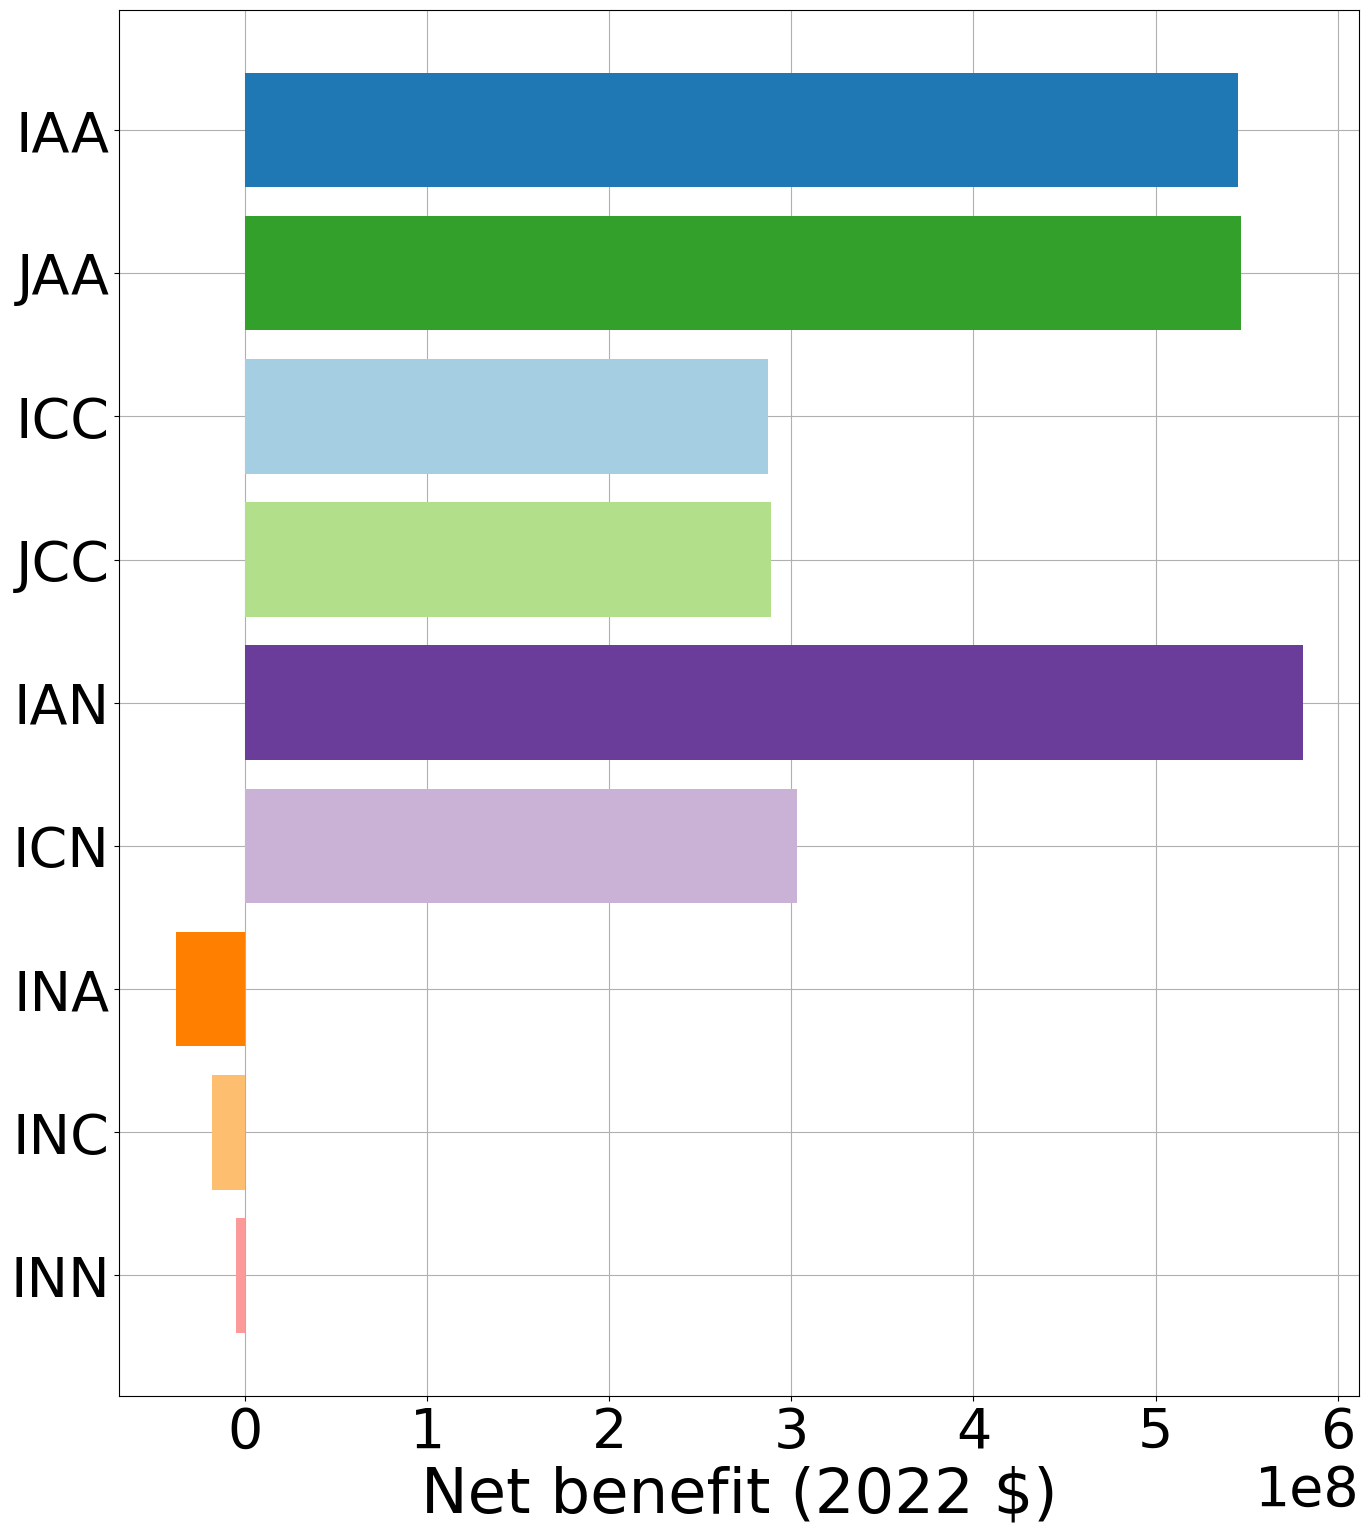

In [137]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.yticks(df_npv_net_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid()
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

In [138]:
# plotting graph (new version)
#ax = df_npv_net_benefit.T.plot(ylabel='Net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
#plt.show()

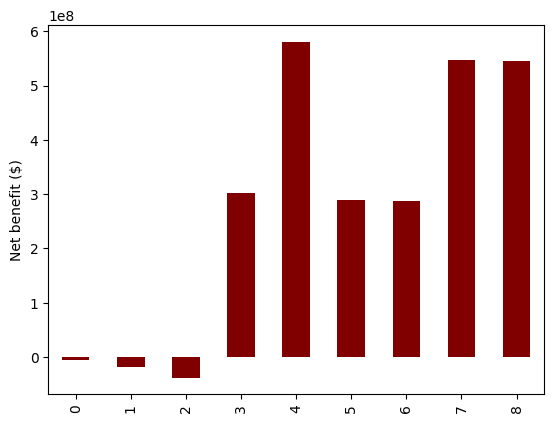

In [139]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color='maroon', legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

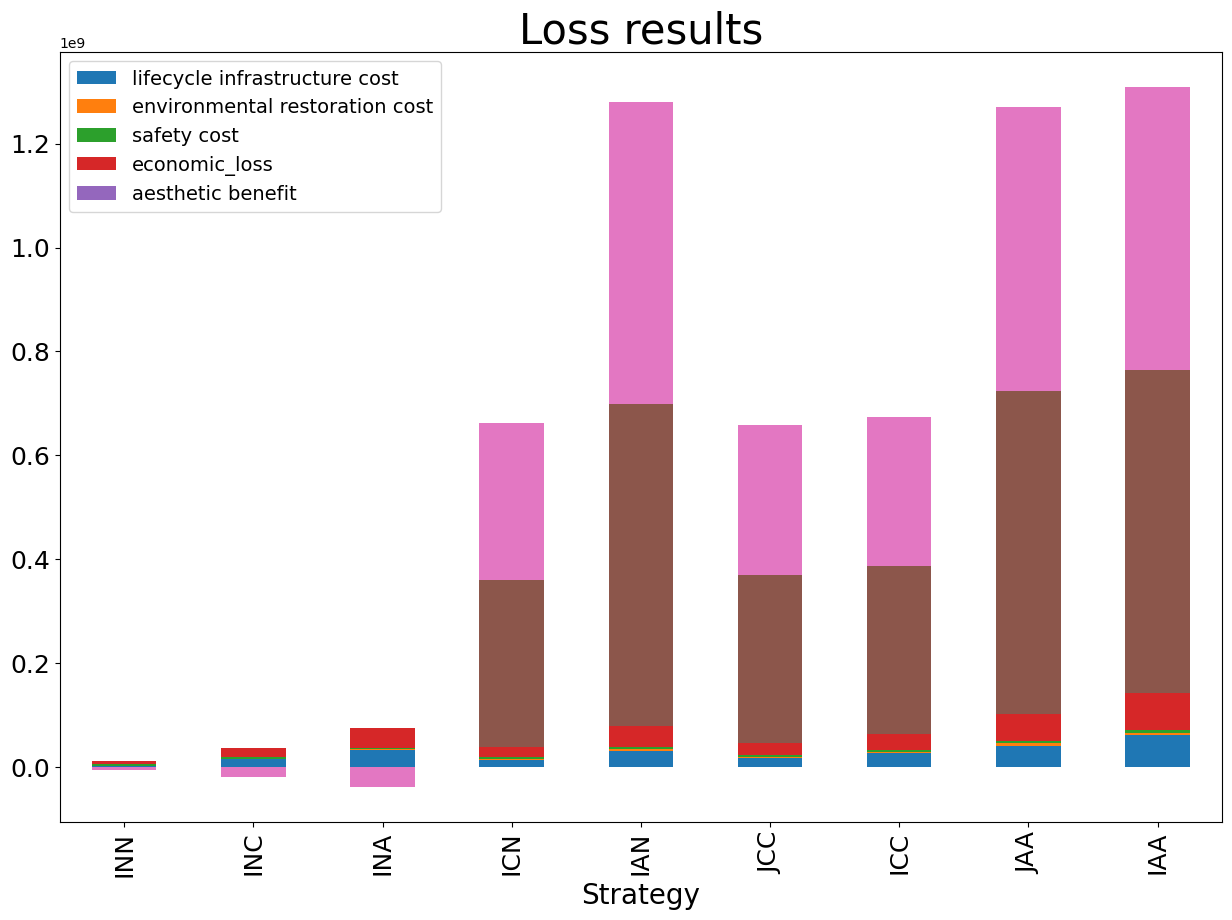

In [140]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [141]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.0,0.0,-5210000.0
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
INA,31800000.0,2.539788e+06,3030000.0,37300000.0,2220.0,0.0,-38000000.0
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,1020.0,322000000.0,303000000.0
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,2220.0,620000000.0,581000000.0
JCC,17700000.0,1.713431e+06,3810000.0,23200000.0,2040.0,323000000.0,289000000.0
ICC,26400000.0,1.713431e+06,3810000.0,31900000.0,2040.0,323000000.0,287000000.0
JAA,40200000.0,5.079576e+06,5360000.0,50700000.0,4440.0,622000000.0,547000000.0
IAA,60900000.0,5.079576e+06,5360000.0,71400000.0,4440.0,622000000.0,545000000.0


In [142]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','economic_losses', 'aesthetic_benefit'], axis=1)

In [143]:
df_npv_cost

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,2390000.0,0.000000e+00,3030000.0
INC,14500000.0,8.567154e+05,3030000.0
INA,31800000.0,2.539788e+06,3030000.0
ICN,14300000.0,8.567154e+05,3810000.0
IAN,31500000.0,2.539788e+06,5360000.0
JCC,17700000.0,1.713431e+06,3810000.0
ICC,26400000.0,1.713431e+06,3810000.0
JAA,40200000.0,5.079576e+06,5360000.0
IAA,60900000.0,5.079576e+06,5360000.0


In [144]:
df_npv_cost=df_npv_cost.reset_index()

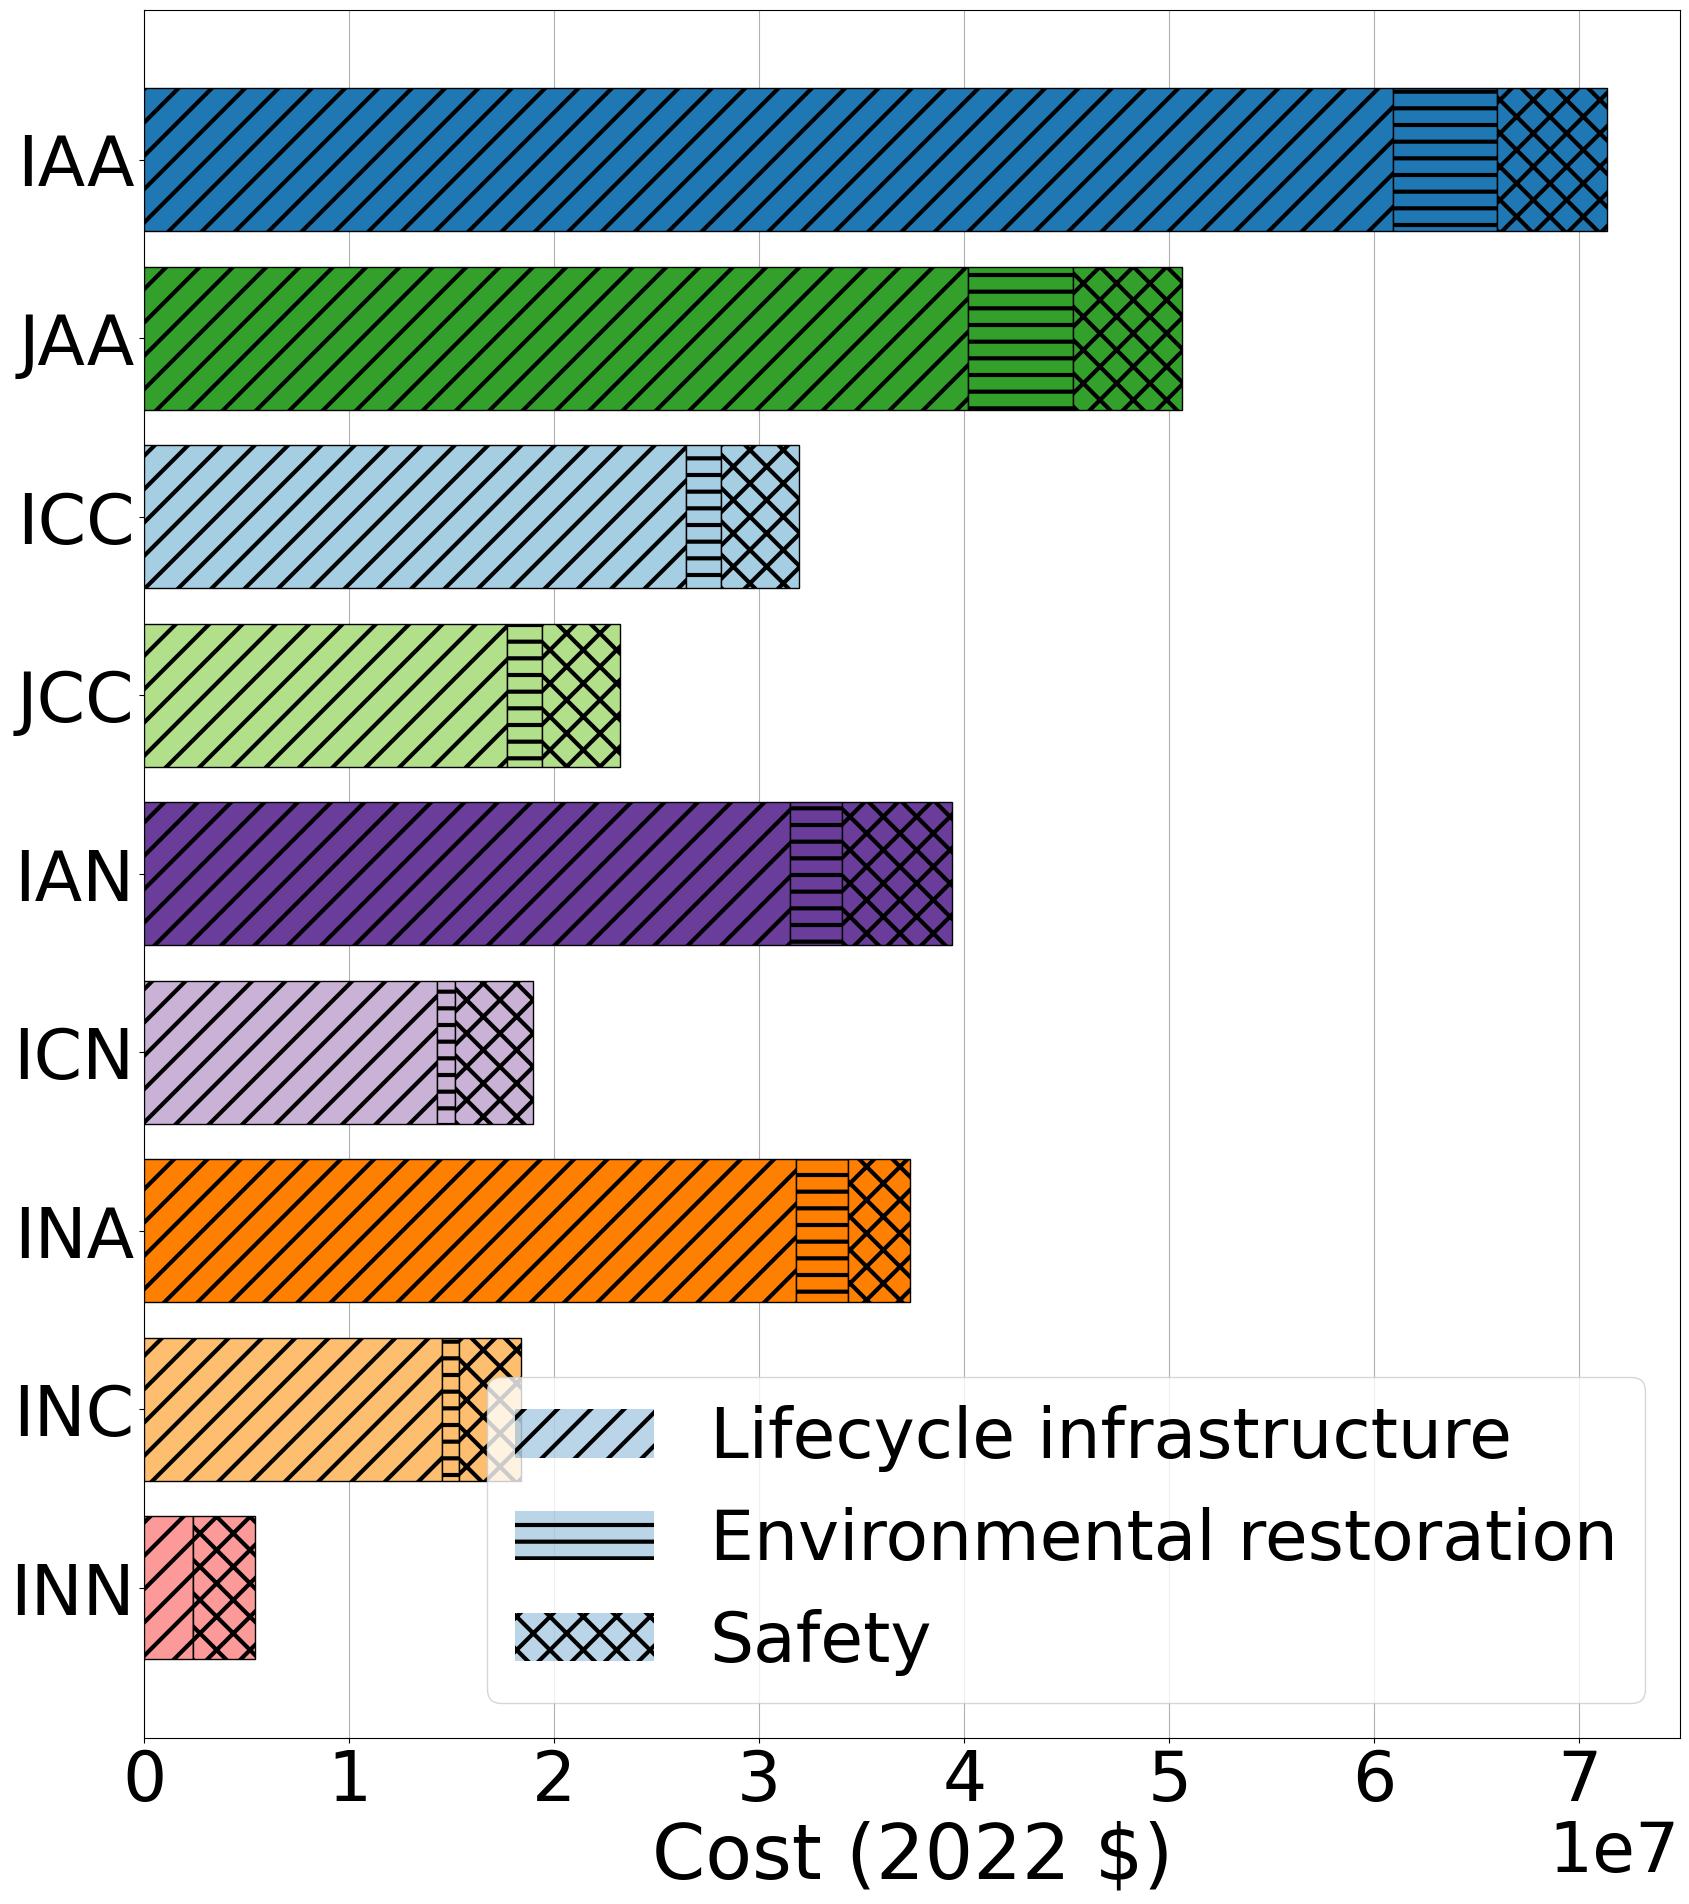

In [145]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)
x= df_npv_cost.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']

#mpl.rc('hatch', color='k', linewidth=1.5)
mpl.rcParams['hatch.linewidth'] = 3.0 

b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3



circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Cost (2022 $)", fontsize=55)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

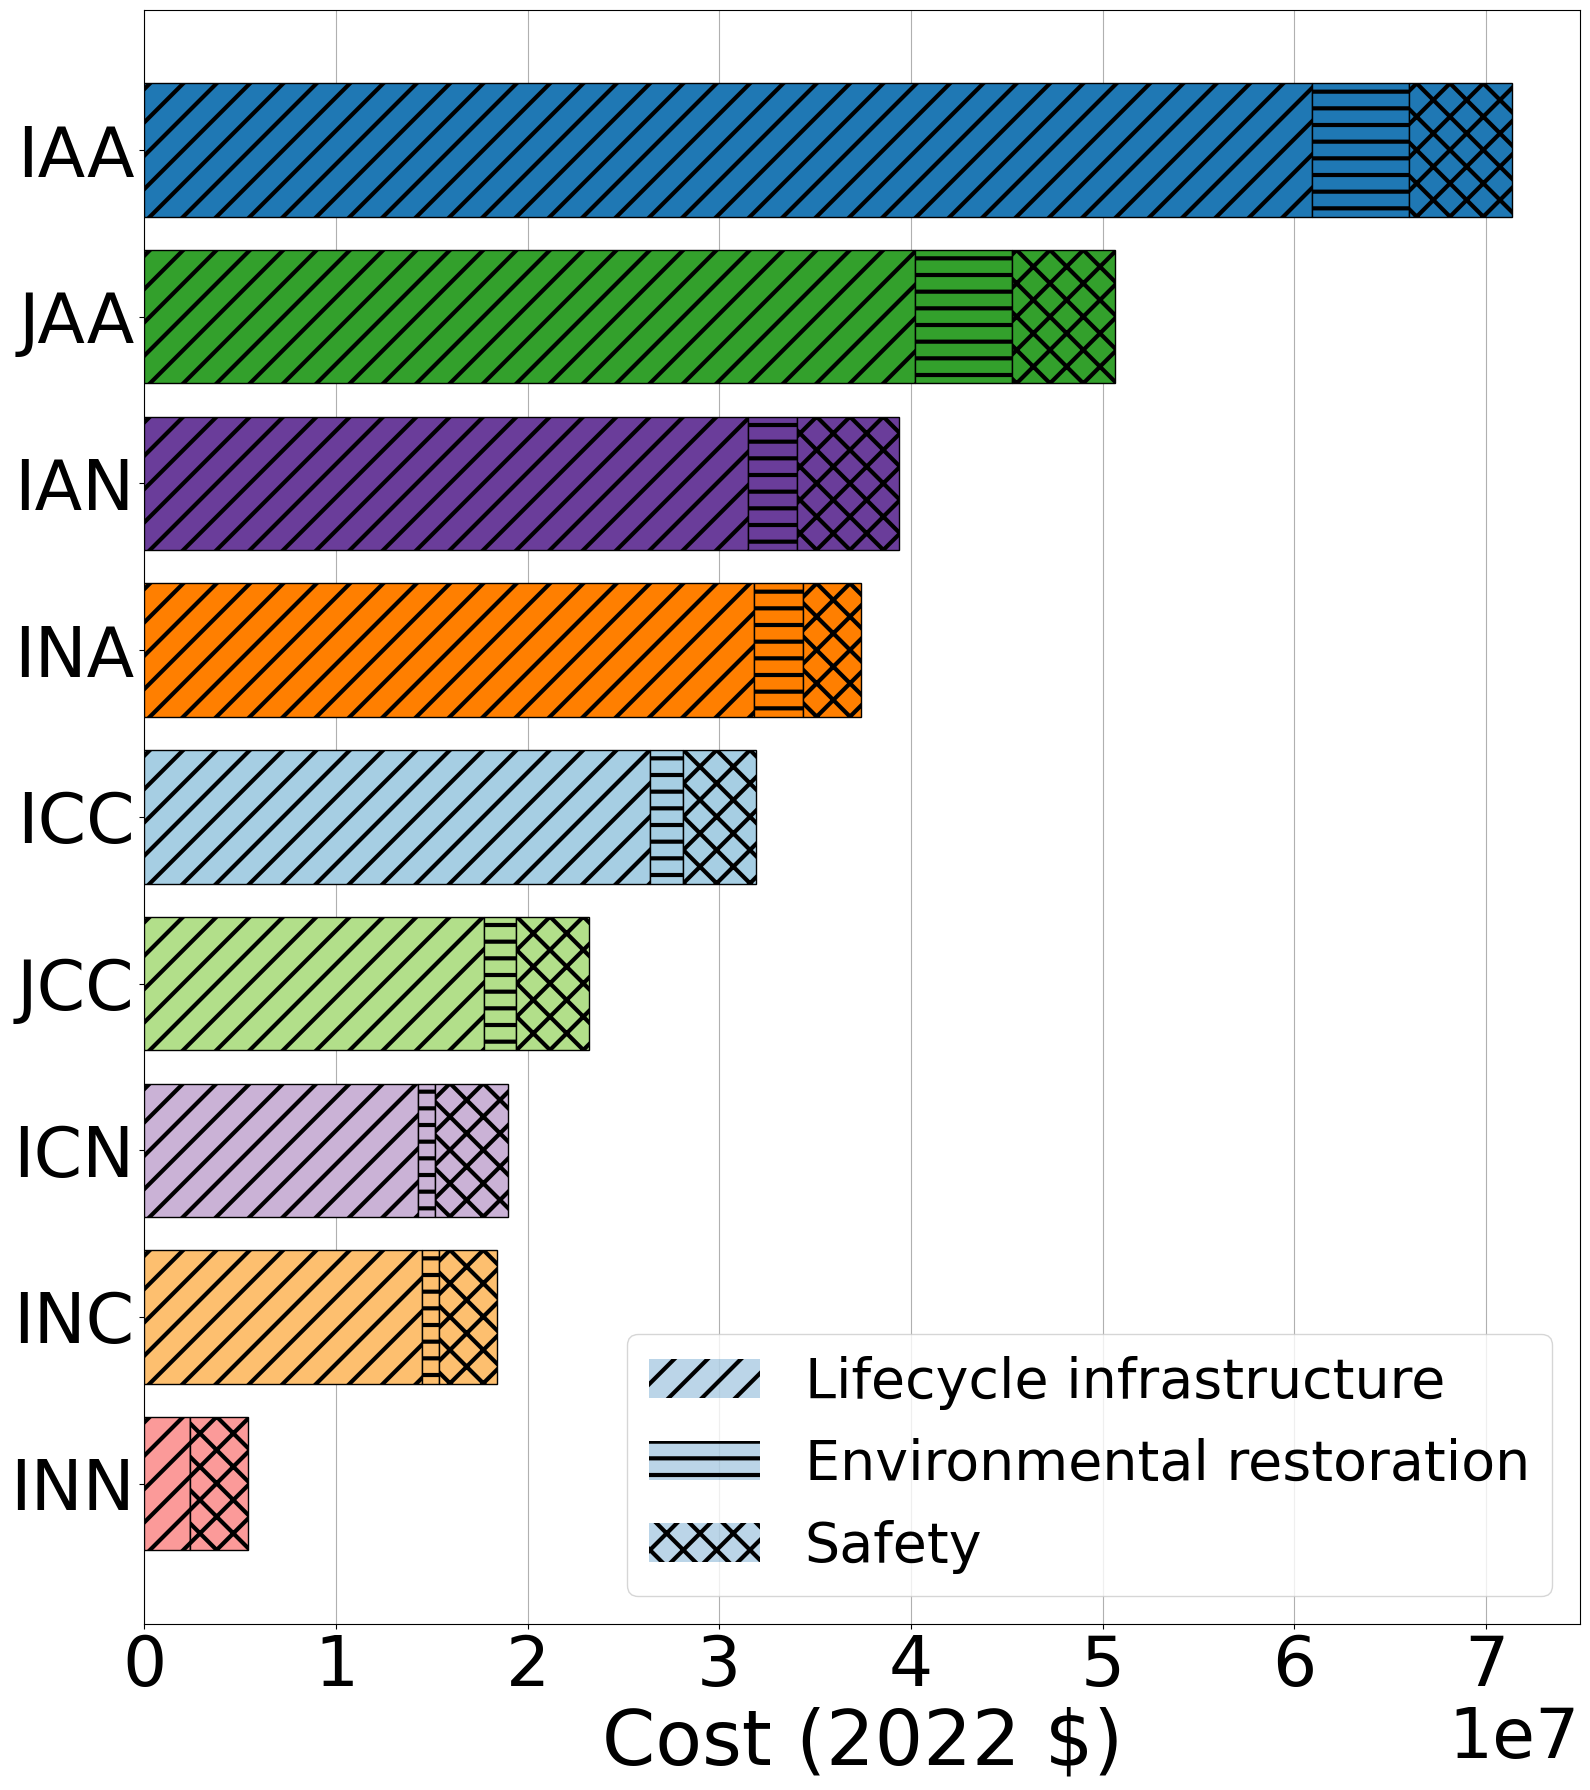

In [174]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_npv_cost is already defined and loaded with data
# Calculate the total for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(16, 18)

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

#['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
#['#FB9A99','#FDBF6F','#6A3D9A','#FF7F00','#A6CEE3','#B2DF8A','#CAB2D6','#33A02C','#1F78B4']

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1,             color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1,    color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost.index, labels=['INN','INC','ICN','JCC','ICC','INA','IAN','JAA','IAA'])


# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [176]:
df_npv_cost['total_cost']=df_npv_cost['lifecycle_infrastructure']+df_npv_cost['environmental_restoration']+df_npv_cost['safety']
df_npv_cost

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost
0,INN,2390000.0,0.000000e+00,3030000.0,5.420000e+06
1,INC,14500000.0,8.567154e+05,3030000.0,1.838672e+07
2,INA,31800000.0,2.539788e+06,3030000.0,3.736979e+07
3,ICN,14300000.0,8.567154e+05,3810000.0,1.896672e+07
4,IAN,31500000.0,2.539788e+06,5360000.0,3.939979e+07
5,JCC,17700000.0,1.713431e+06,3810000.0,2.322343e+07
6,ICC,26400000.0,1.713431e+06,3810000.0,3.192343e+07
7,JAA,40200000.0,5.079576e+06,5360000.0,5.063958e+07
8,IAA,60900000.0,5.079576e+06,5360000.0,7.133958e+07


In [177]:
(3.192343e+07-2.322343e+07)/3.192343e+07

0.2725271062664632

In [178]:
(7.133958e+07-5.063958e+07)/7.133958e+07

0.29016150641761557

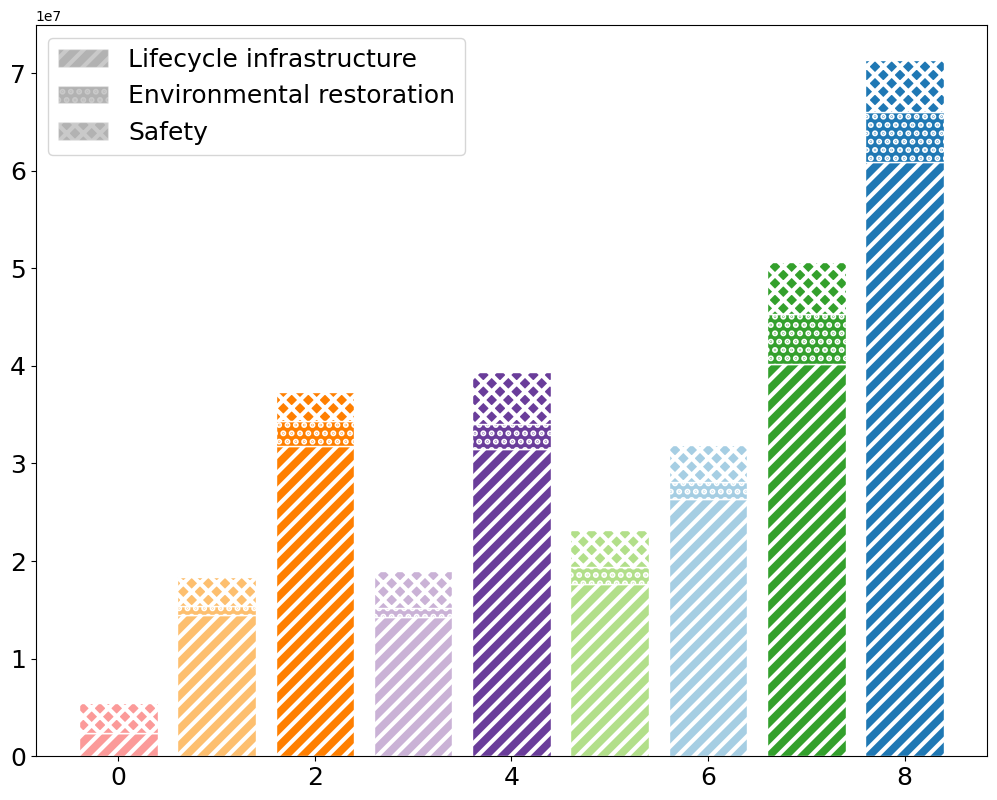

In [44]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 8)

x= df_npv_cost.index
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White', hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',edgecolor='White', alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)
plt.show()

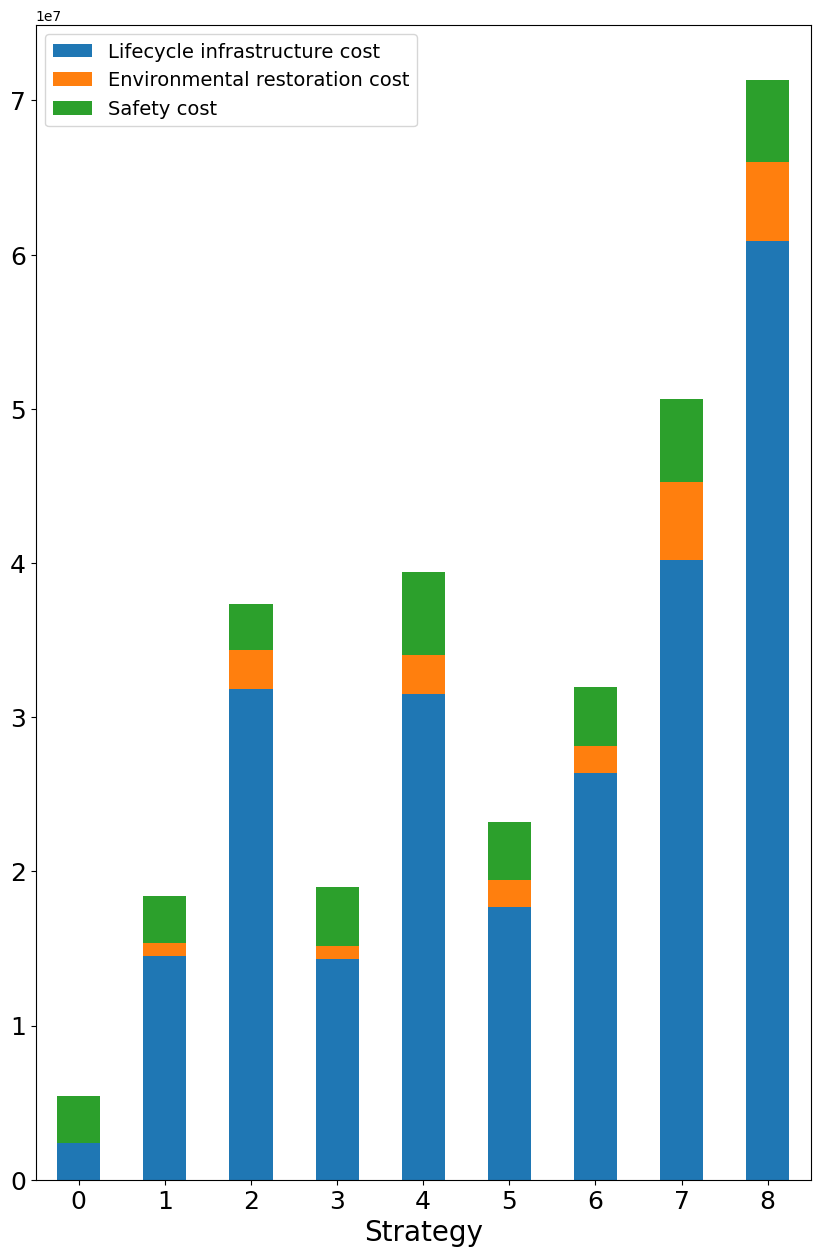

In [45]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [46]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [47]:
df_npv_loss

,economic_losses
Strategy,
INN,0.0
INC,0.0
INA,0.0
ICN,322000000.0
IAN,620000000.0
JCC,323000000.0
ICC,323000000.0
JAA,622000000.0
IAA,622000000.0


In [48]:
df_npv_loss=df_npv_loss.reset_index()

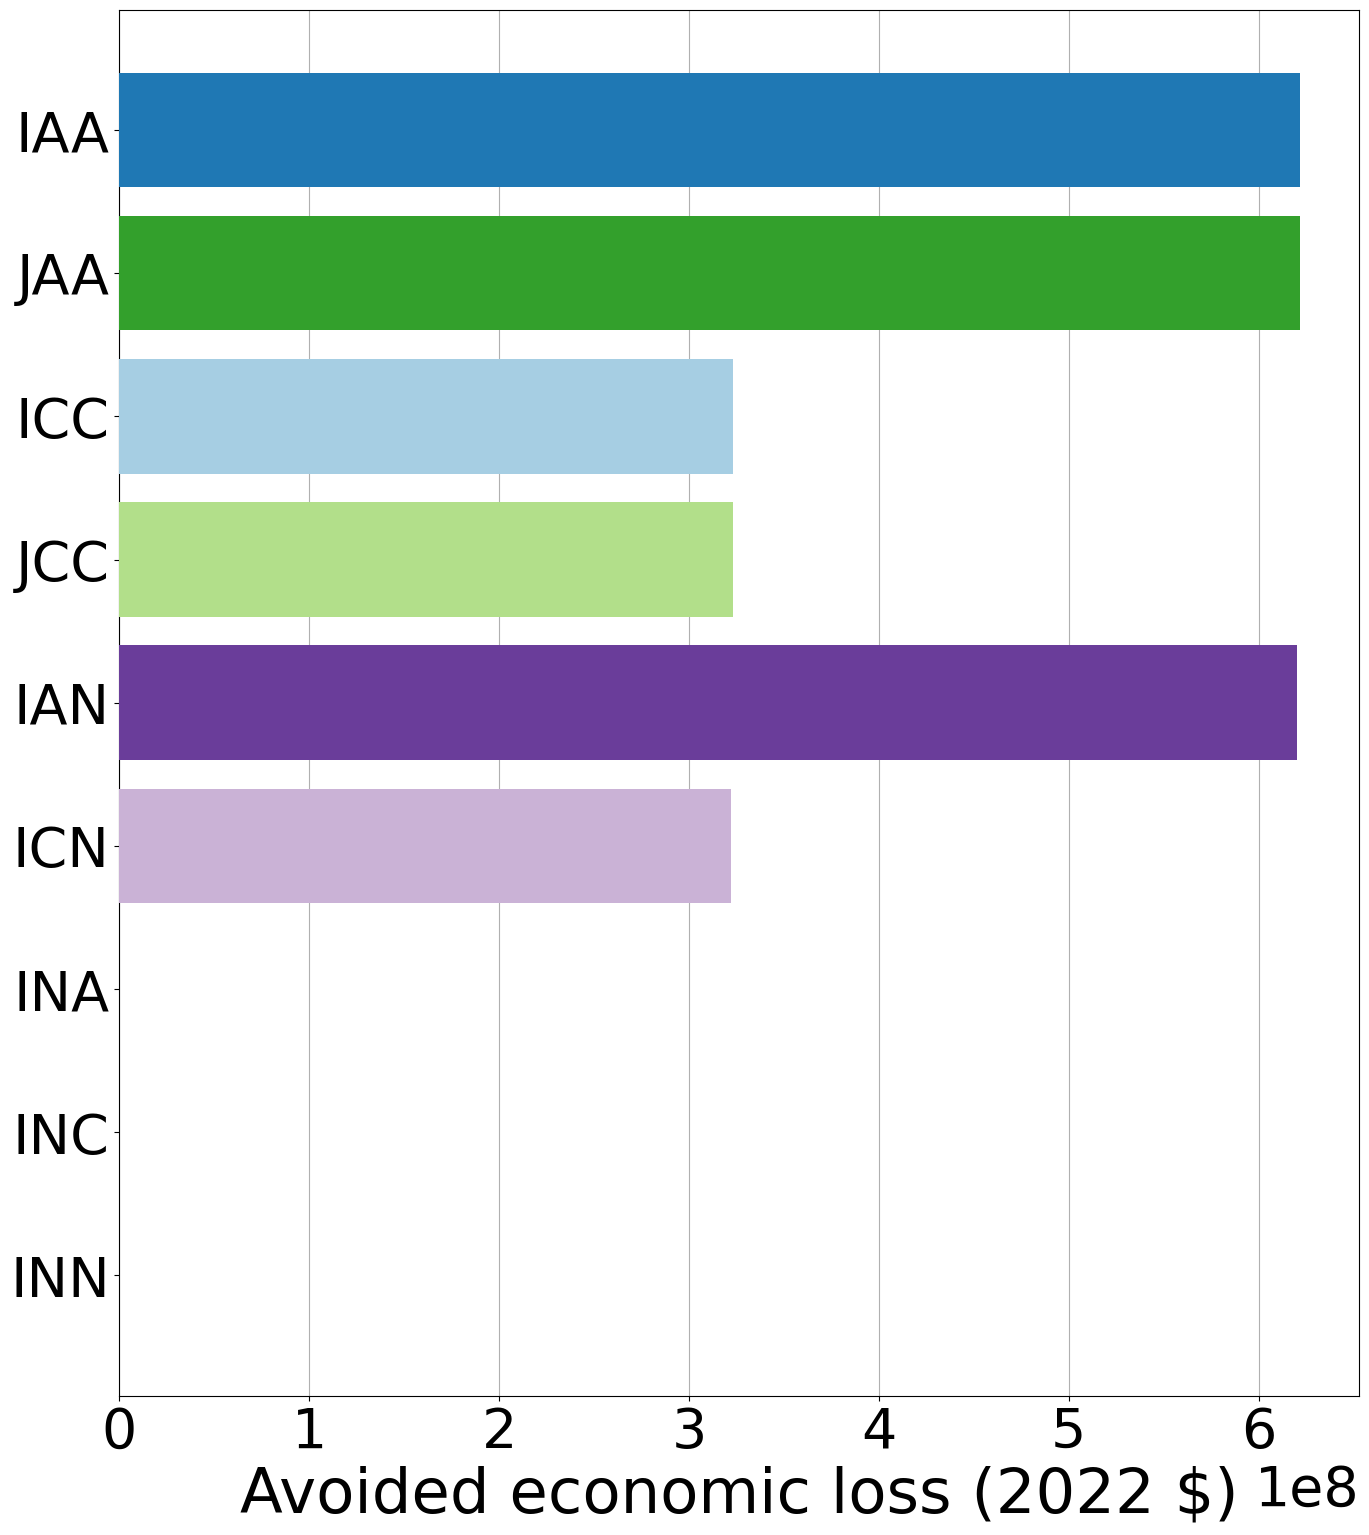

In [49]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss.loc[i,"economic_losses"],color=row, zorder=3)
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

In [50]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Loss results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

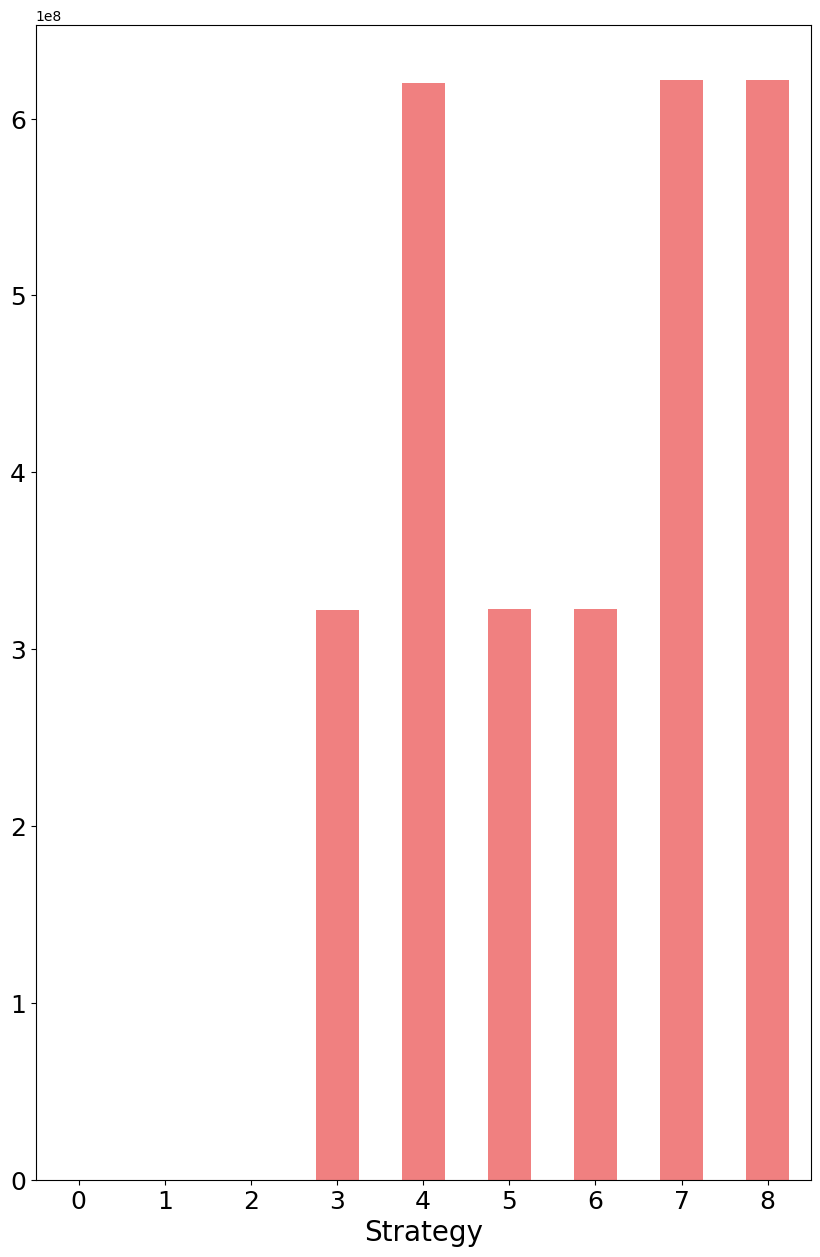

In [51]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [52]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [53]:
df_npv_benefit

,aesthetic_benefit
Strategy,
INN,0.0
INC,1020.0
INA,2220.0
ICN,1020.0
IAN,2220.0
JCC,2040.0
ICC,2040.0
JAA,4440.0
IAA,4440.0


In [54]:
df_npv_benefit=df_npv_benefit.reset_index()

In [55]:
df_npv_benefit

,Strategy,aesthetic_benefit
0,INN,0.0
1,INC,1020.0
2,INA,2220.0
3,ICN,1020.0
4,IAN,2220.0
5,JCC,2040.0
6,ICC,2040.0
7,JAA,4440.0
8,IAA,4440.0


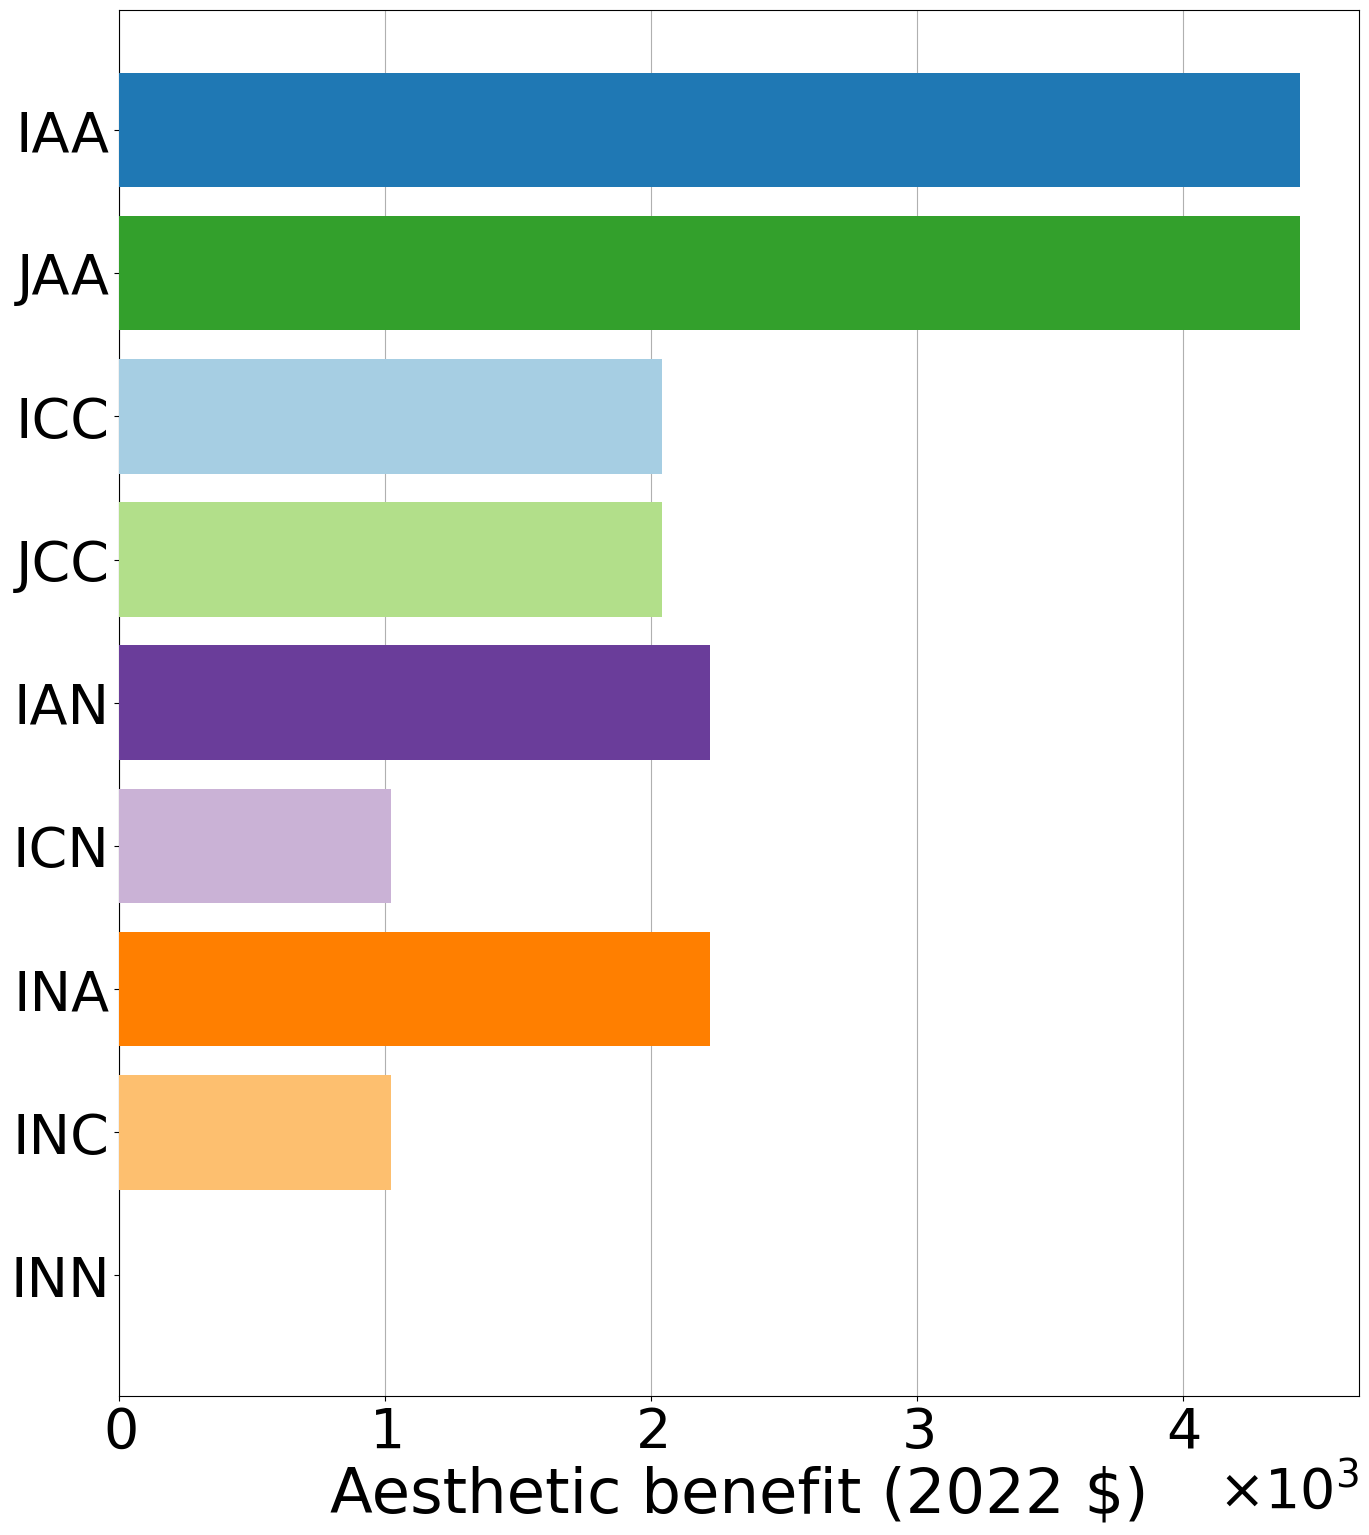

In [56]:
from matplotlib.ticker import ScalarFormatter

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

# Set scientific notation for x-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_fontsize(40)

ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

In [57]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

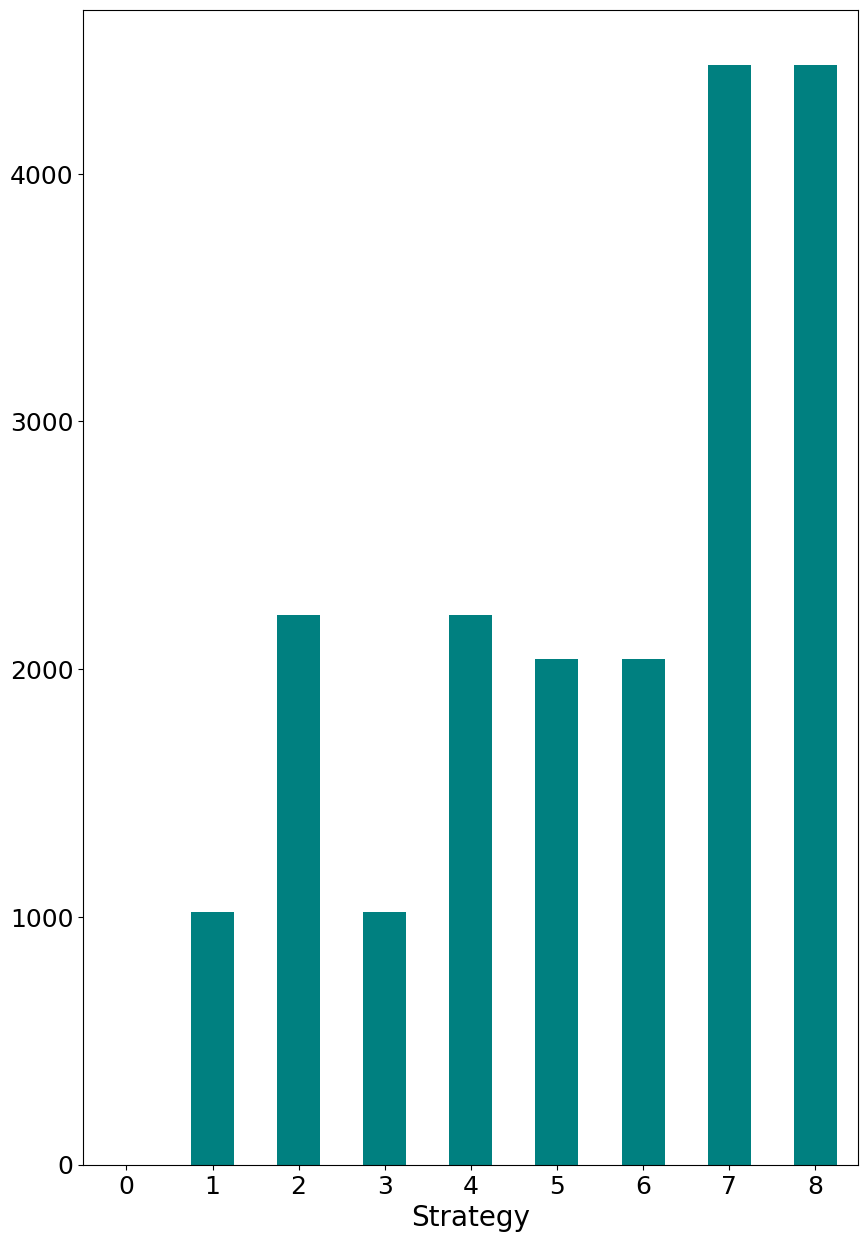

In [58]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [59]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,INC,12200000.0,8.567154e+05,0.0,13000000.0,1020.0,0.0,-13000000.0
2,INA,29400000.0,2.539788e+06,0.0,31900000.0,2220.0,0.0,-31900000.0
3,ICN,11900000.0,8.567154e+05,778000.0,13500000.0,1020.0,322000000.0,308000000.0
4,IAN,29100000.0,2.539788e+06,2330000.0,34000000.0,2220.0,620000000.0,586000000.0
5,JCC,15300000.0,1.713431e+06,778000.0,17800000.0,2040.0,323000000.0,305000000.0
6,ICC,24000000.0,1.713431e+06,778000.0,26500000.0,2040.0,323000000.0,296000000.0
7,JAA,37800000.0,5.079576e+06,2330000.0,45200000.0,4440.0,622000000.0,577000000.0
8,IAA,58500000.0,5.079576e+06,2330000.0,65900000.0,4440.0,622000000.0,556000000.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [61]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [62]:
df_npv_net_benefit_relative

,net_benefit
Strategy,
INN,0.0
INC,-13000000.0
INA,-31900000.0
ICN,308000000.0
IAN,586000000.0
JCC,305000000.0
ICC,296000000.0
JAA,577000000.0
IAA,556000000.0


In [63]:
df_npv_net_benefit_relative=df_npv_net_benefit_relative.reset_index()

ValueError: The number of FixedLocator locations (23), usually from a call to set_ticks, does not match the number of labels (9).

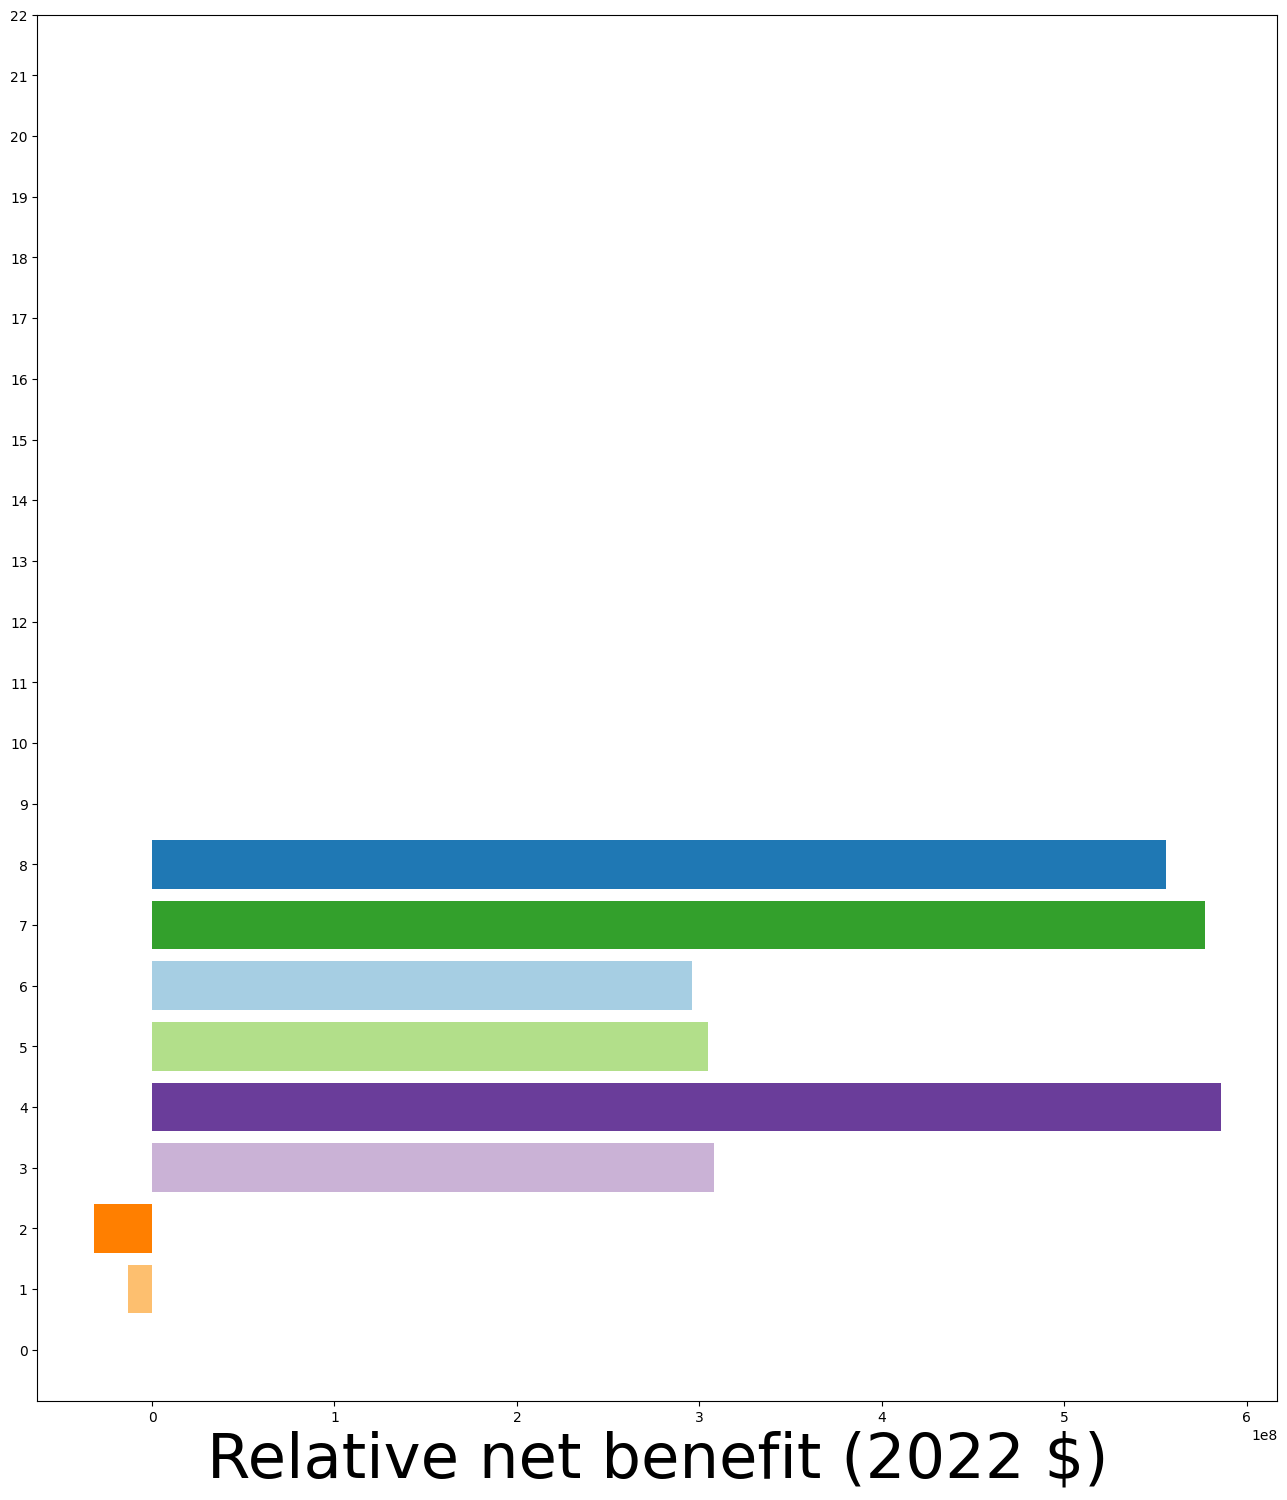

In [64]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit_relative.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Relative net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_net_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [71]:
# plotting graph (Ver 02)
#ax = df_npv_net_benefit_relative.T.plot(ylabel='Relative net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
#plt.show()

<Axes: ylabel='Relative net benefit ($)'>

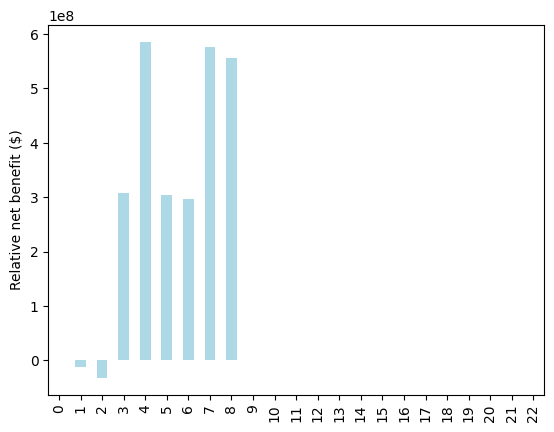

In [72]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
#plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [73]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [74]:
df_npv_cost_loss_benefit_relative

,lifecycle_infrastructure,environmental_restoration,safety,aesthetic_benefit,economic_losses
Strategy,,,,,
INN,0.0,0.000000e+00,0.0,0.0,0.0
INC,12200000.0,8.567154e+05,0.0,1020.0,0.0
INA,29400000.0,2.539788e+06,0.0,2220.0,0.0
ICN,11900000.0,8.567154e+05,778000.0,1020.0,322000000.0
IAN,29100000.0,2.539788e+06,2330000.0,2220.0,620000000.0
JCC,15300000.0,1.713431e+06,778000.0,2040.0,323000000.0
ICC,24000000.0,1.713431e+06,778000.0,2040.0,323000000.0
JAA,37800000.0,5.079576e+06,2330000.0,4440.0,622000000.0
IAA,58500000.0,5.079576e+06,2330000.0,4440.0,622000000.0


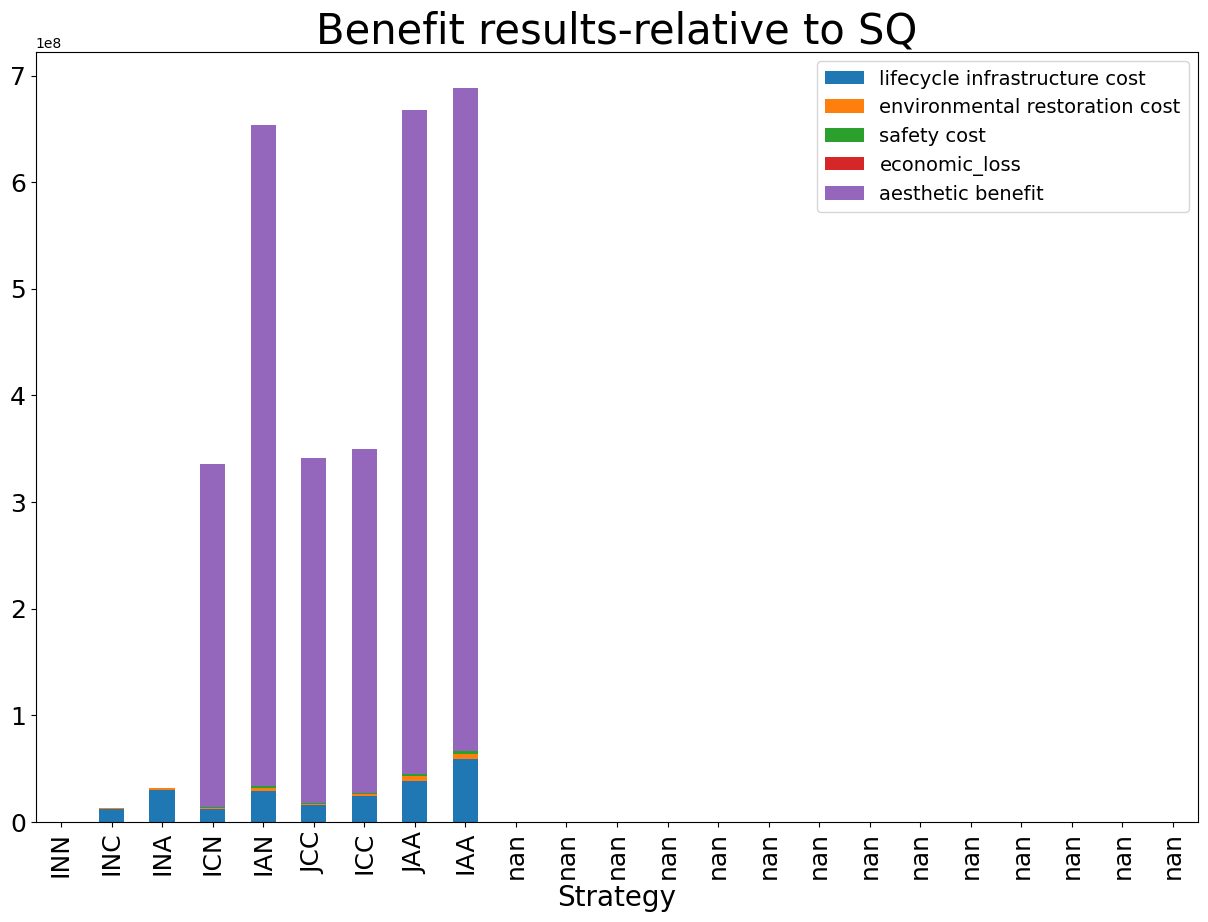

In [75]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [76]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

In [77]:
df_npv_cost_relative

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,0.0,0.000000e+00,0.0
INC,12200000.0,8.567154e+05,0.0
INA,29400000.0,2.539788e+06,0.0
ICN,11900000.0,8.567154e+05,778000.0
IAN,29100000.0,2.539788e+06,2330000.0
JCC,15300000.0,1.713431e+06,778000.0
ICC,24000000.0,1.713431e+06,778000.0
JAA,37800000.0,5.079576e+06,2330000.0
IAA,58500000.0,5.079576e+06,2330000.0


In [78]:
df_npv_cost_relative=df_npv_cost_relative.reset_index()

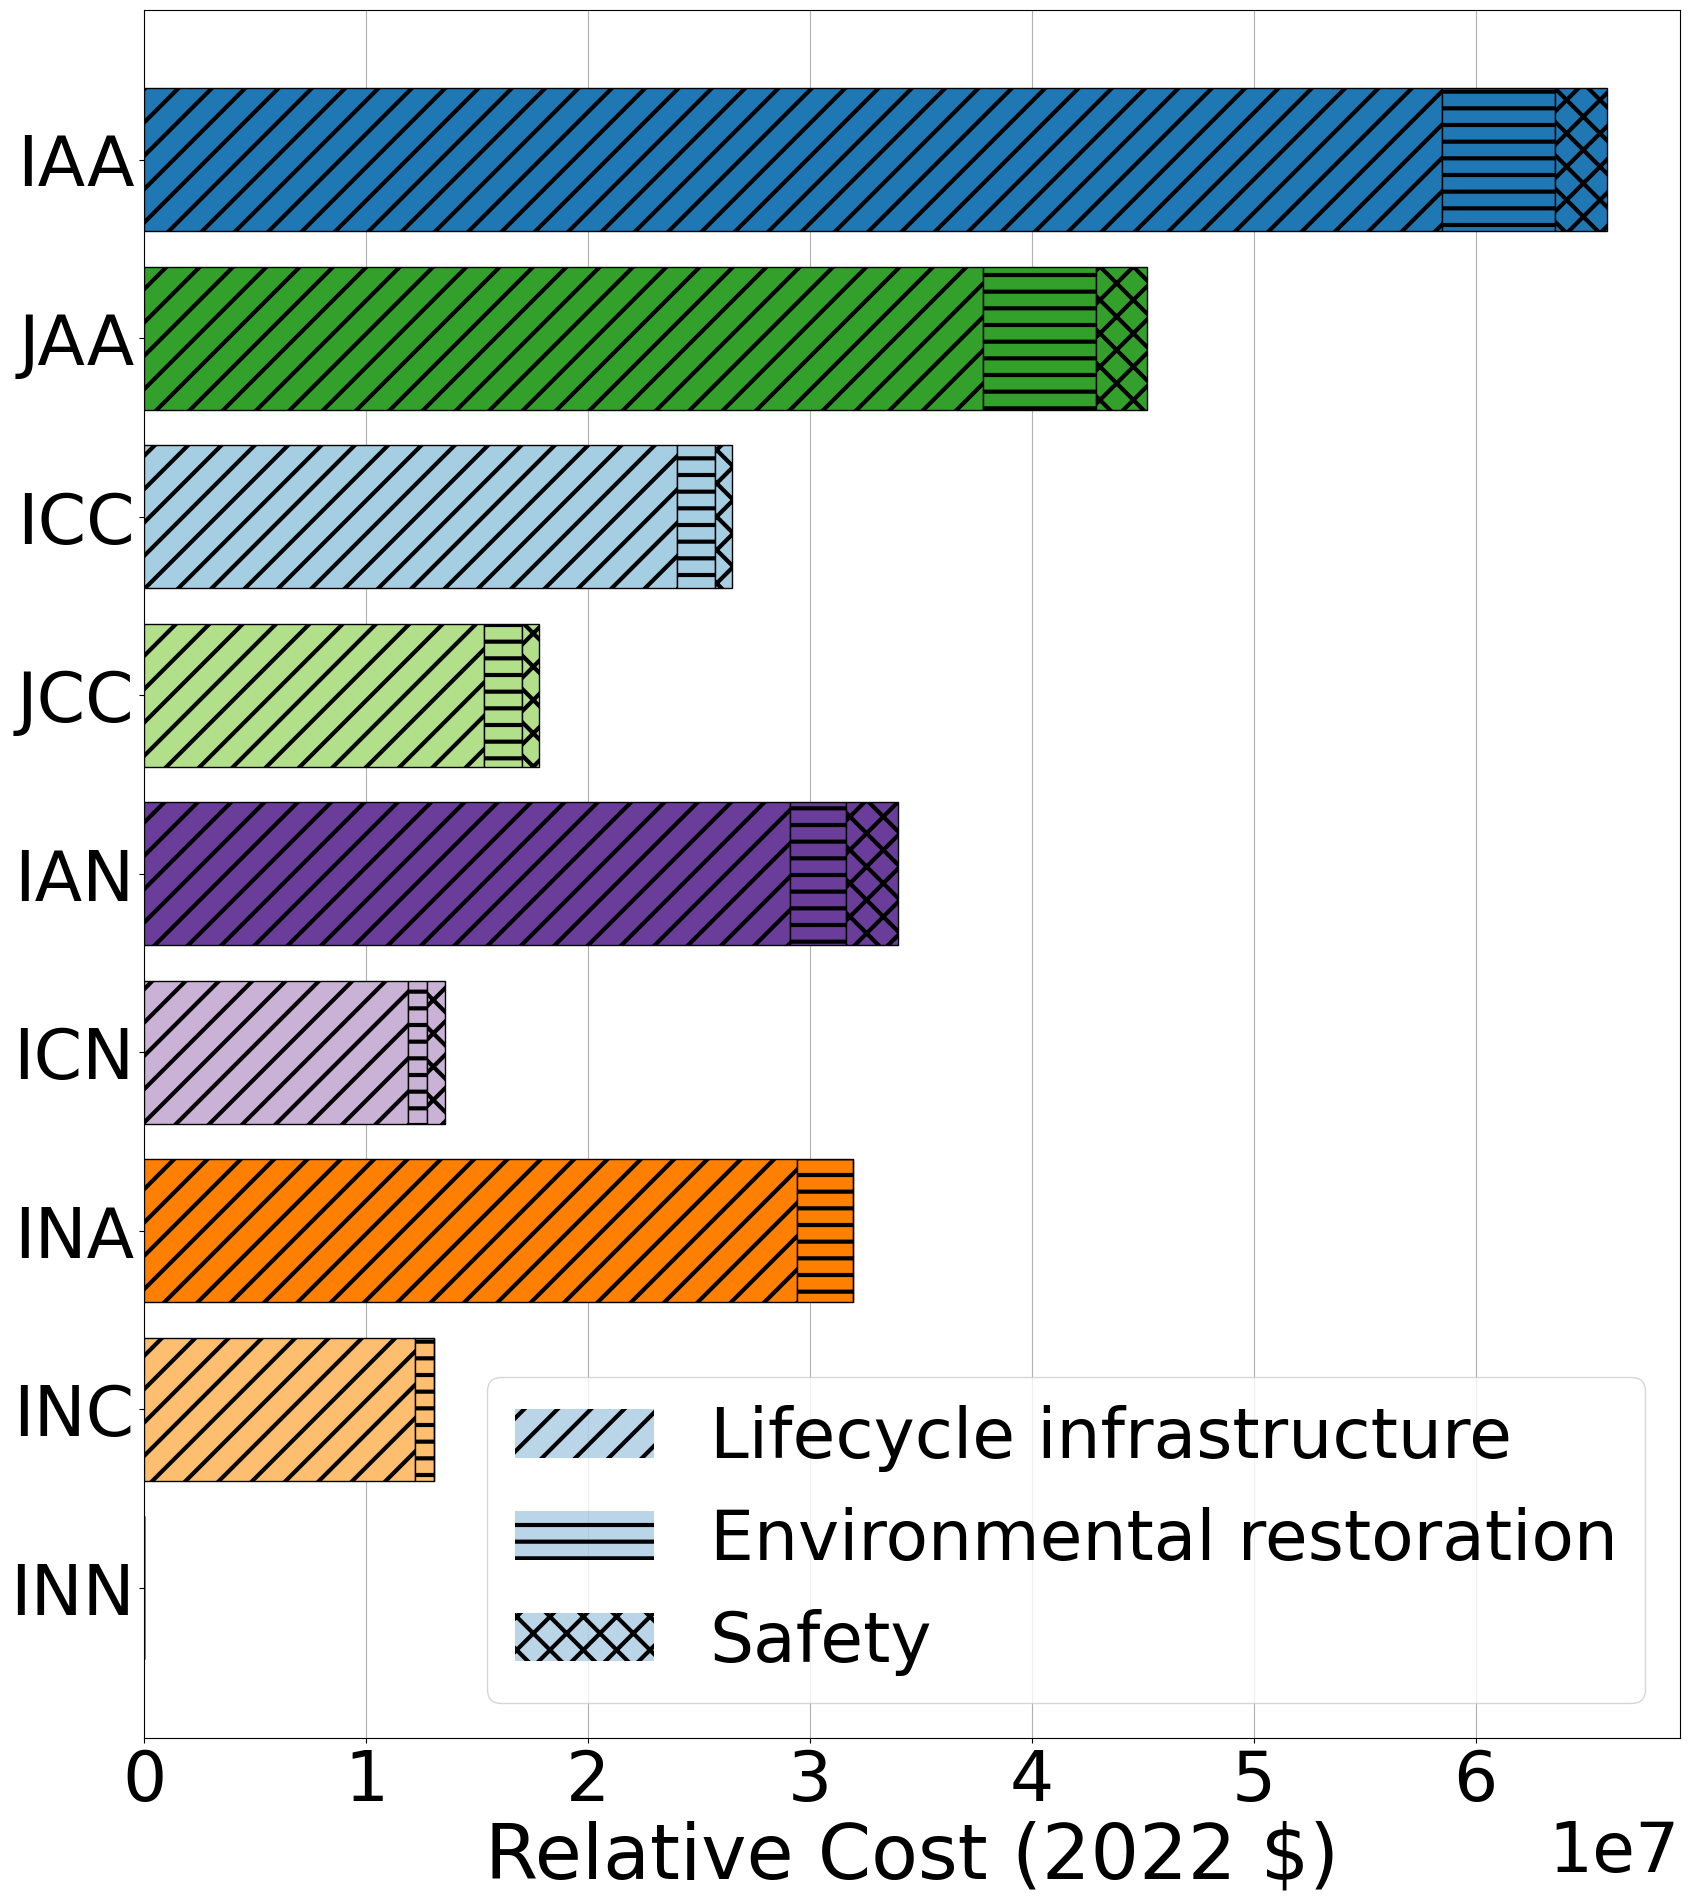

In [100]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)

x= df_npv_cost_relative.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']

mpl.rcParams['hatch.linewidth'] = 3.0 


b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black',hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3

circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()
plt.xlabel("Relative Cost (2022 $)", fontsize=55)

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

plt.show()

In [80]:
### Pareto plot



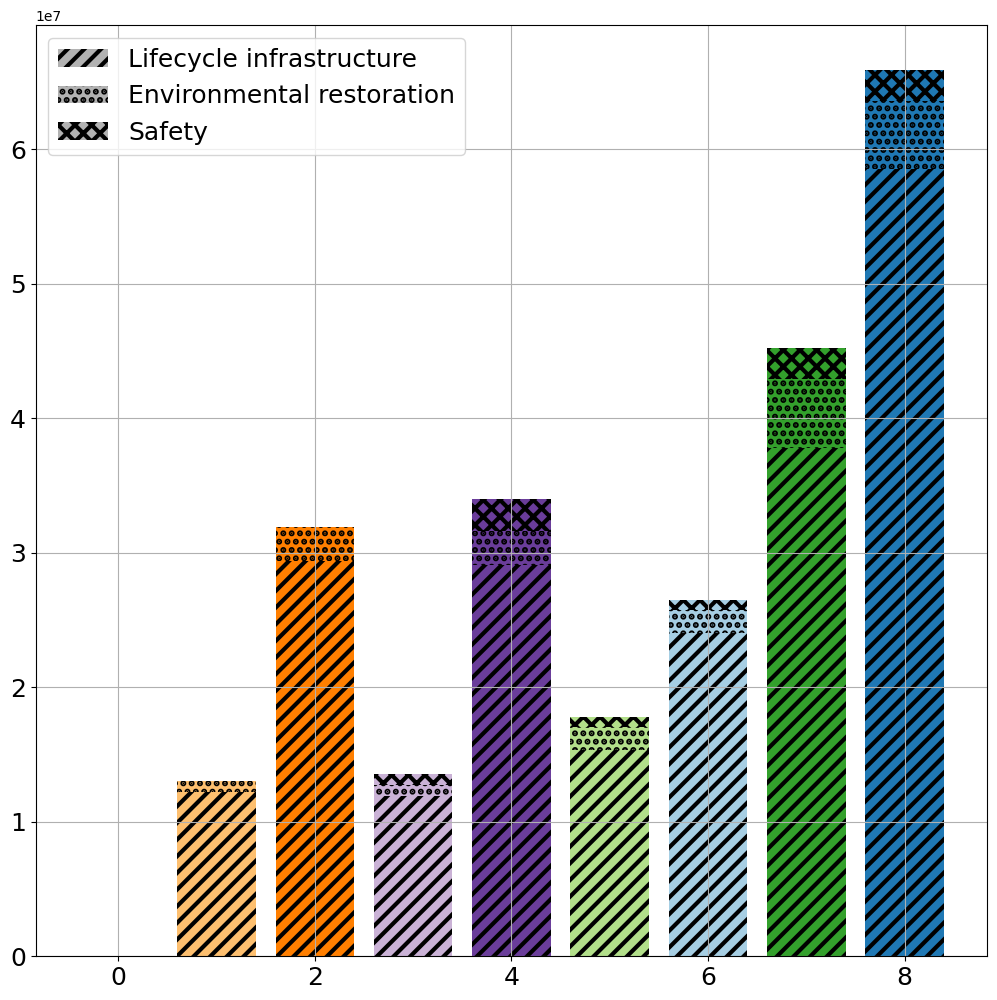

In [81]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 10)

x= df_npv_cost_relative.index
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22')])

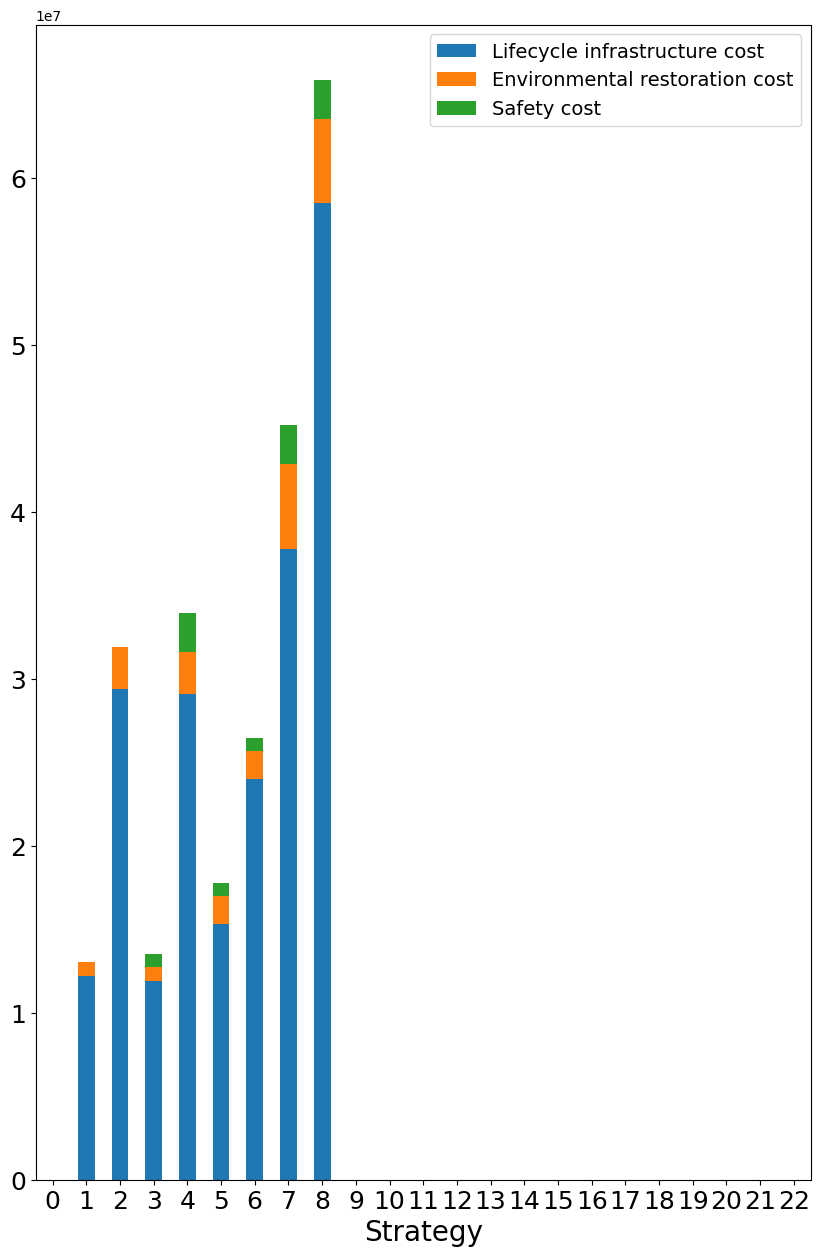

In [82]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)

In [83]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [84]:
df_npv_loss_relative

,economic_losses
Strategy,
INN,0.0
INC,0.0
INA,0.0
ICN,322000000.0
IAN,620000000.0
JCC,323000000.0
ICC,323000000.0
JAA,622000000.0
IAA,622000000.0


In [85]:
df_npv_loss_relative=df_npv_loss_relative.reset_index()

ValueError: The number of FixedLocator locations (23), usually from a call to set_ticks, does not match the number of labels (9).

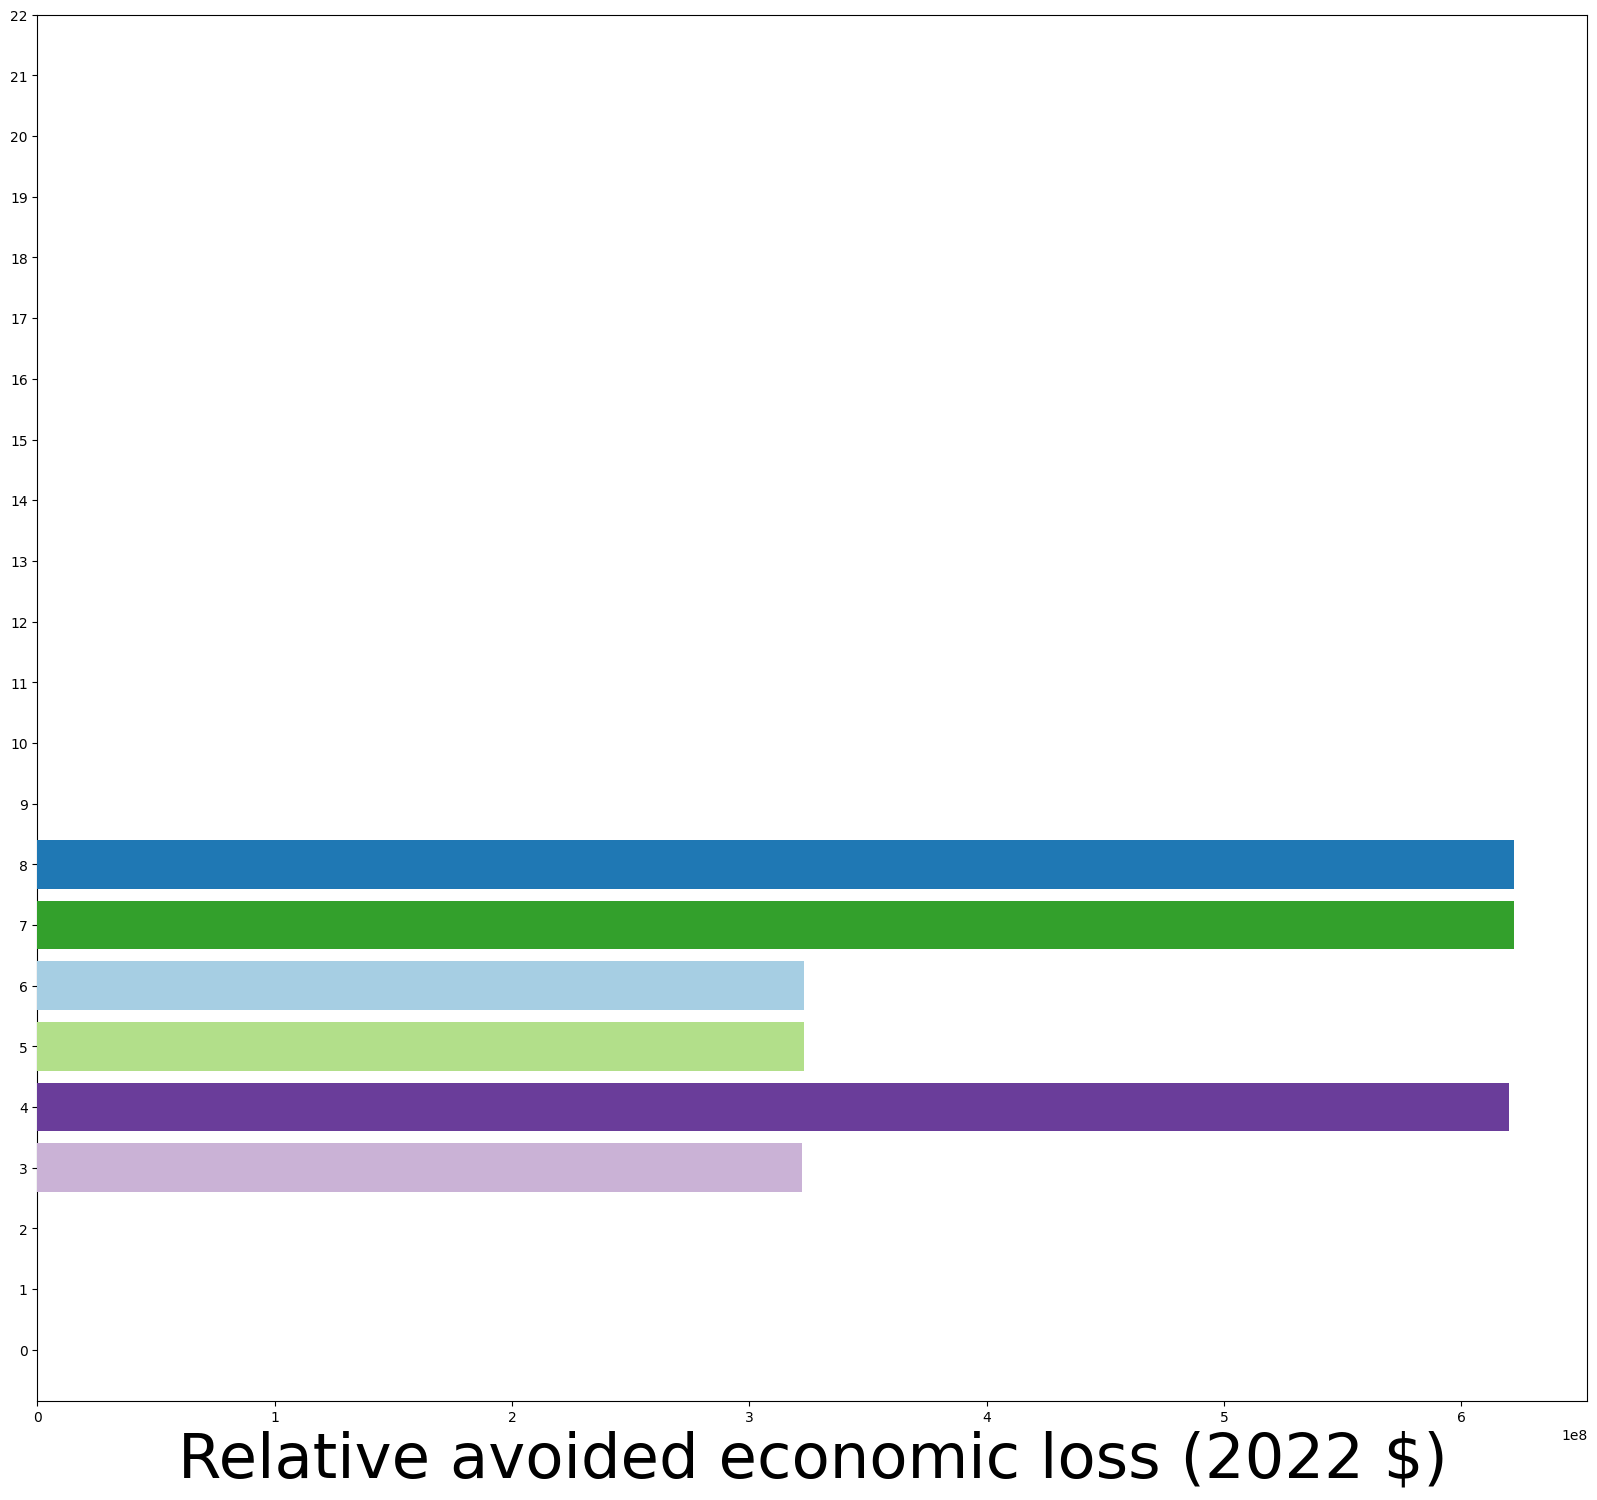

In [86]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss_relative.loc[i,"economic_losses"],color=row, zorder=3)
plt.xlabel ('Relative avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [87]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.yticks(fontsize=18)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22')])

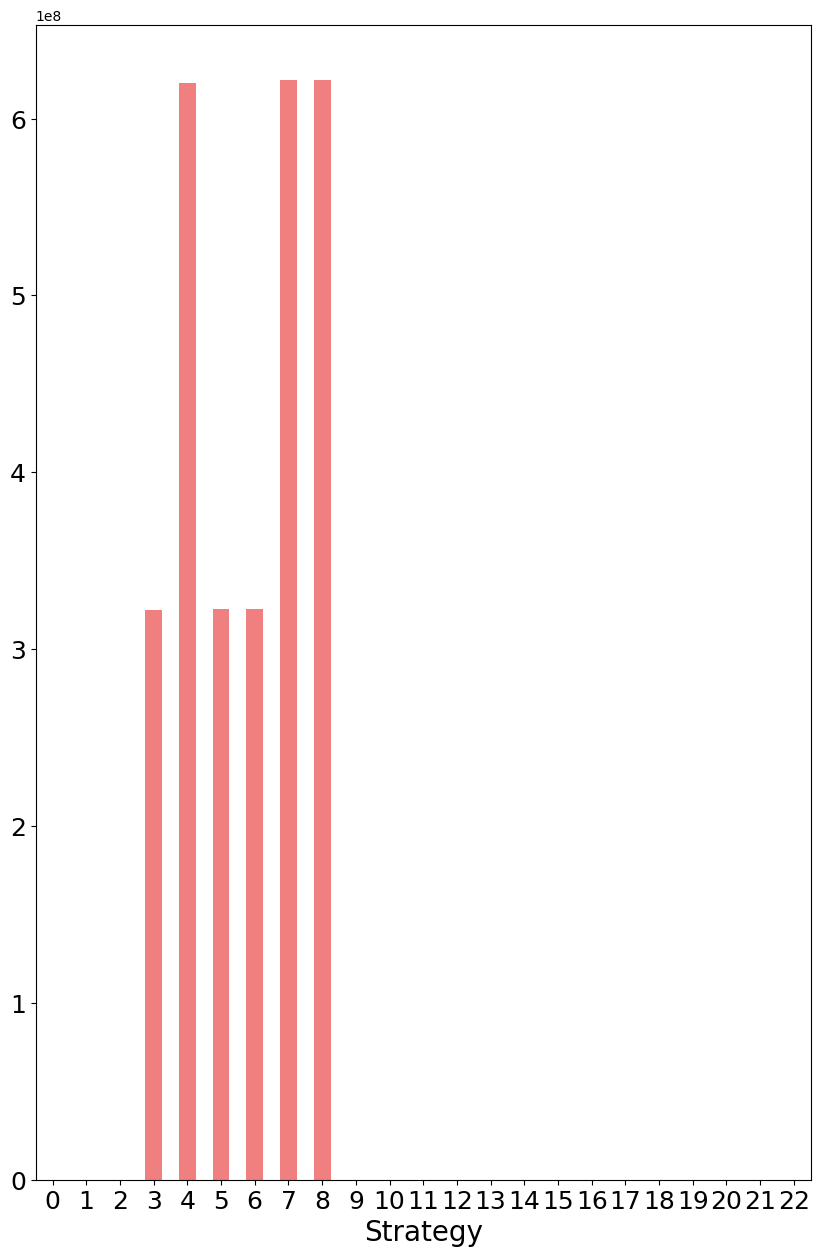

In [88]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [89]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [90]:
#df_npv_benefit_relative=df_npv_benefit_relative.reset_index()

In [91]:
df_npv_benefit_relative

,aesthetic_benefit
Strategy,
INN,0.0
INC,1020.0
INA,2220.0
ICN,1020.0
IAN,2220.0
JCC,2040.0
ICC,2040.0
JAA,4440.0
IAA,4440.0


KeyError: 0

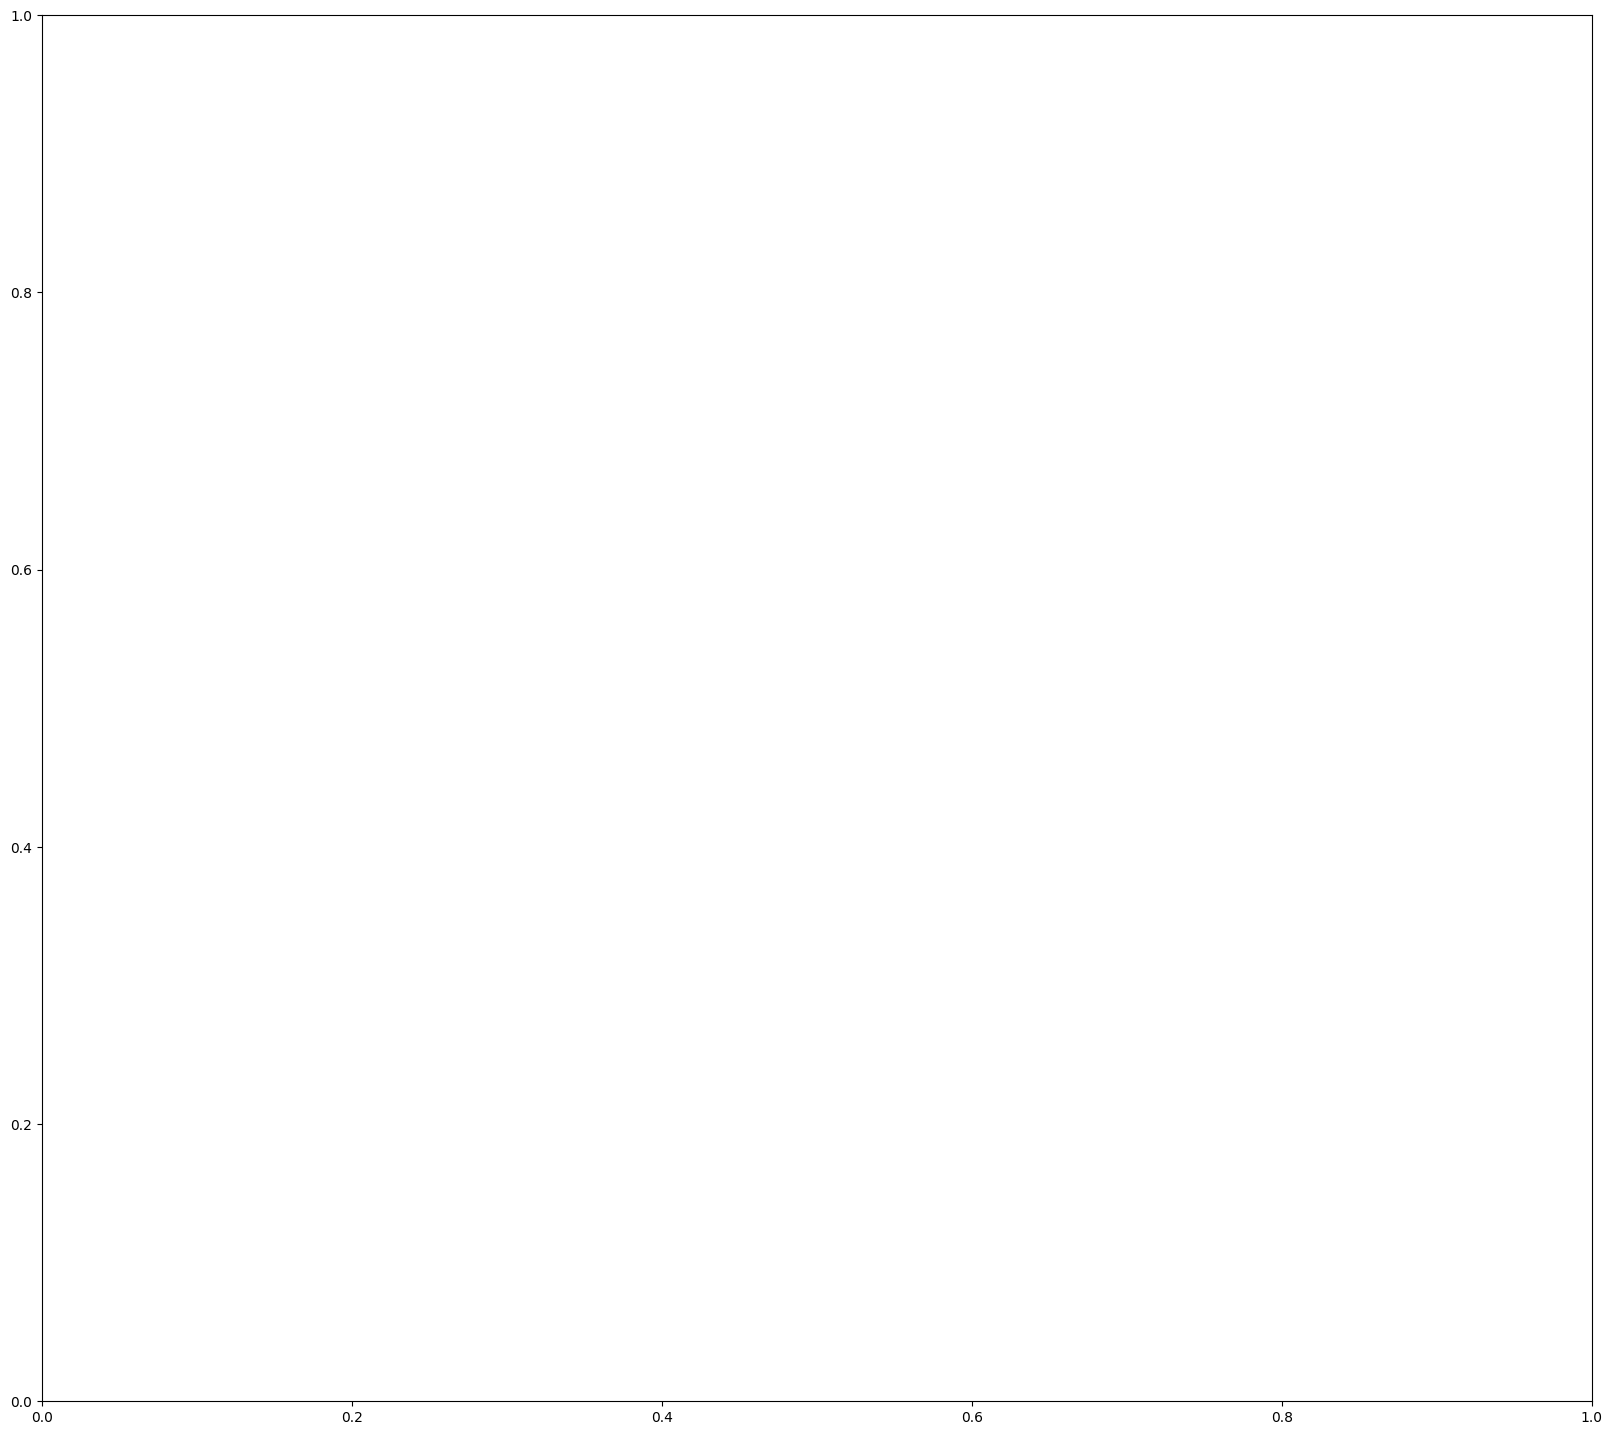

In [92]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit_relative.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Relative aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
##plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=26)
#plt.yticks(fontsize=26)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

In [ ]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

In [93]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.0,0.0,-5210000.0
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0
INA,31800000.0,2.539788e+06,3030000.0,37300000.0,2220.0,0.0,-38000000.0
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,1020.0,322000000.0,303000000.0
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,2220.0,620000000.0,581000000.0
JCC,17700000.0,1.713431e+06,3810000.0,23200000.0,2040.0,323000000.0,289000000.0
ICC,26400000.0,1.713431e+06,3810000.0,31900000.0,2040.0,323000000.0,287000000.0
JAA,40200000.0,5.079576e+06,5360000.0,50700000.0,4440.0,622000000.0,547000000.0
IAA,60900000.0,5.079576e+06,5360000.0,71400000.0,4440.0,622000000.0,545000000.0


In [94]:
df_npv_cost_loss_benefit['benefit_loss']=df_npv_cost_loss_benefit['aesthetic_benefit']+df_npv_cost_loss_benefit['economic_losses']
df_npv_cost_loss_benefit['cost_benefit_ratio']=df_npv_cost_loss_benefit['total_cost']/df_npv_cost_loss_benefit['benefit_loss']
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit,benefit_loss,cost_benefit_ratio
Strategy,,,,,,,,,
INN,2390000.0,0.000000e+00,3030000.0,5420000.0,0.0,0.0,-5210000.0,0.0,inf
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0,1020.0,1.803922e+04
INA,31800000.0,2.539788e+06,3030000.0,37300000.0,2220.0,0.0,-38000000.0,2220.0,1.680180e+04
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,1020.0,322000000.0,303000000.0,322001020.0,5.869547e-02
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,2220.0,620000000.0,581000000.0,620002220.0,6.354816e-02
JCC,17700000.0,1.713431e+06,3810000.0,23200000.0,2040.0,323000000.0,289000000.0,323002040.0,7.182617e-02
ICC,26400000.0,1.713431e+06,3810000.0,31900000.0,2040.0,323000000.0,287000000.0,323002040.0,9.876099e-02
JAA,40200000.0,5.079576e+06,5360000.0,50700000.0,4440.0,622000000.0,547000000.0,622004440.0,8.151067e-02
IAA,60900000.0,5.079576e+06,5360000.0,71400000.0,4440.0,622000000.0,545000000.0,622004440.0,1.147902e-01


In [95]:
df_pareto_plots=df_npv_cost_loss_benefit.copy()

In [96]:
df_pareto_plots=df_pareto_plots.loc[df_pareto_plots.index!='INN']
df_pareto_plots

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit,benefit_loss,cost_benefit_ratio
Strategy,,,,,,,,,
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0,1020.0,18039.215686
INA,31800000.0,2.539788e+06,3030000.0,37300000.0,2220.0,0.0,-38000000.0,2220.0,16801.801802
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,1020.0,322000000.0,303000000.0,322001020.0,0.058695
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,2220.0,620000000.0,581000000.0,620002220.0,0.063548
JCC,17700000.0,1.713431e+06,3810000.0,23200000.0,2040.0,323000000.0,289000000.0,323002040.0,0.071826
ICC,26400000.0,1.713431e+06,3810000.0,31900000.0,2040.0,323000000.0,287000000.0,323002040.0,0.098761
JAA,40200000.0,5.079576e+06,5360000.0,50700000.0,4440.0,622000000.0,547000000.0,622004440.0,0.081511
IAA,60900000.0,5.079576e+06,5360000.0,71400000.0,4440.0,622000000.0,545000000.0,622004440.0,0.114790


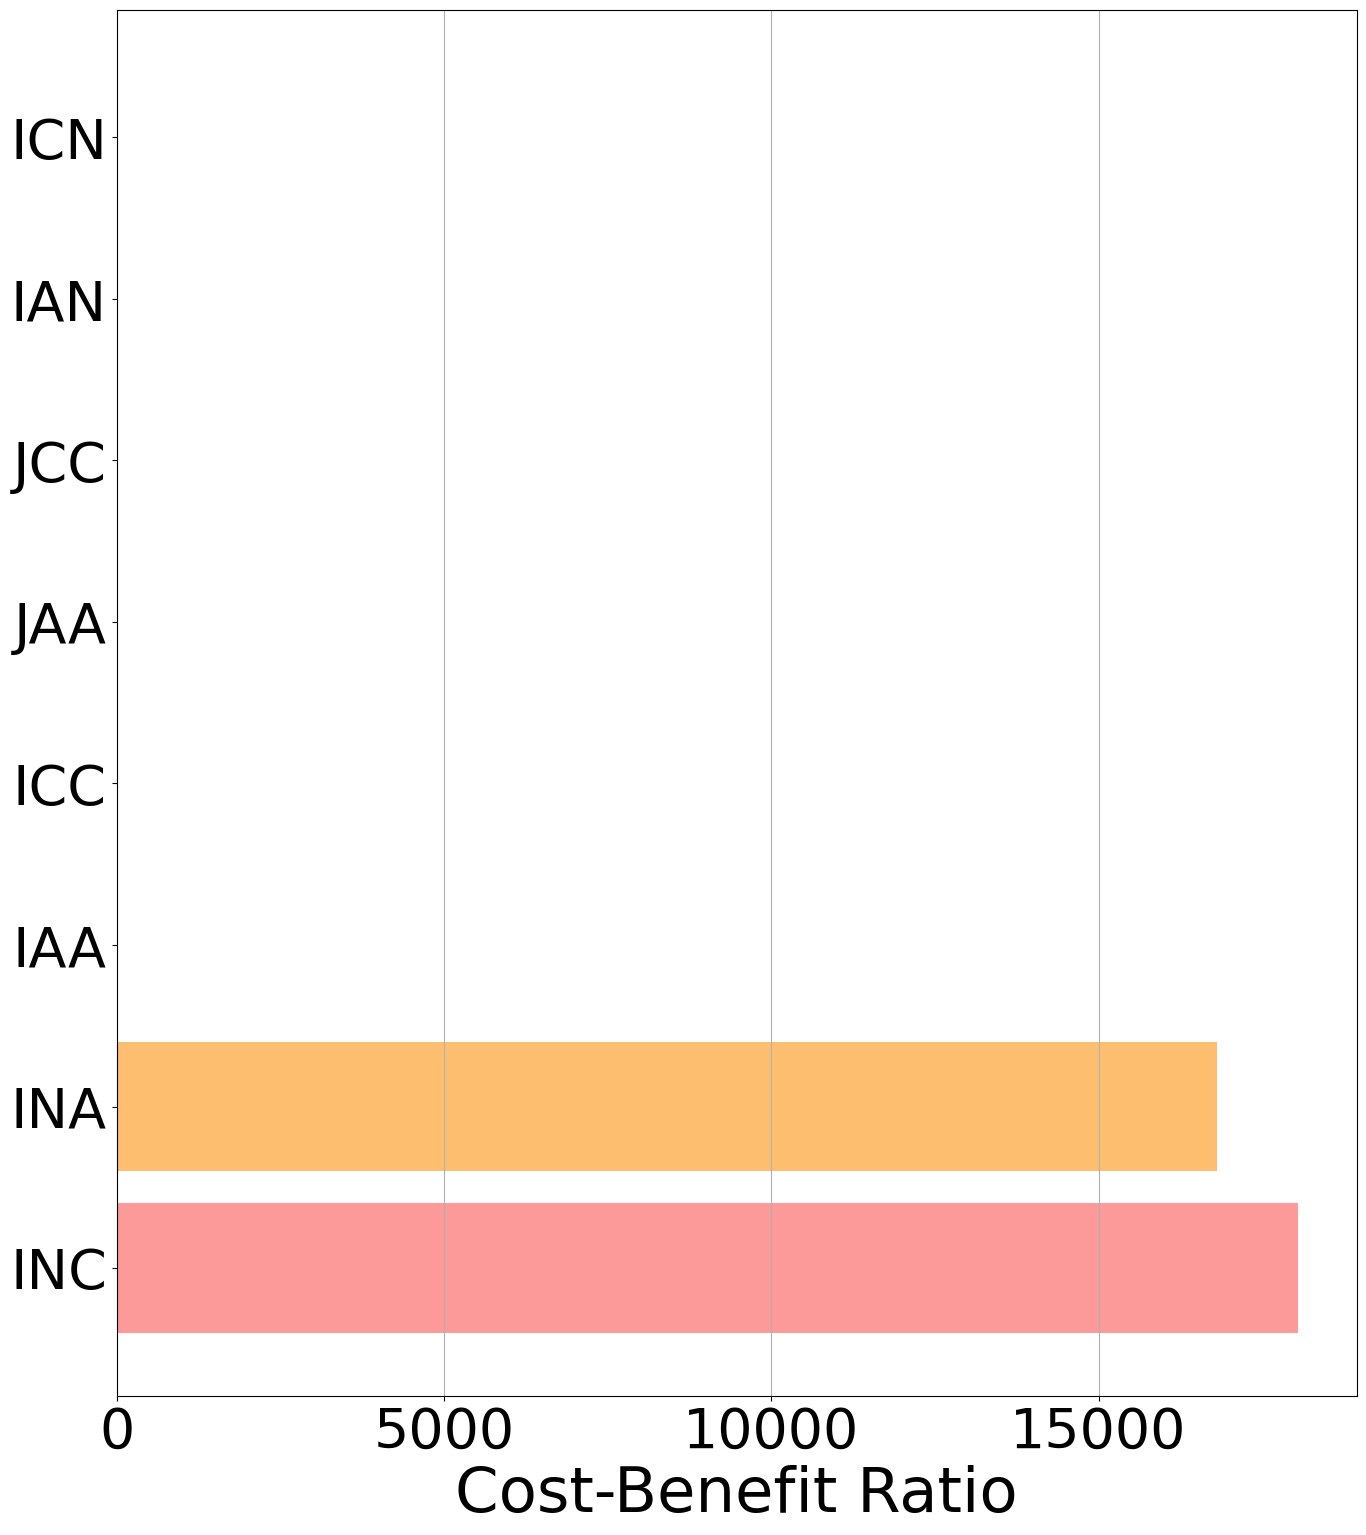

In [97]:
# Sorting the DataFrame based on 'cost_benefit_ratio'
df_pareto_sorted = df_pareto_plots.sort_values(by='cost_benefit_ratio', ascending=False)

# Colors as specified by user
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

# Creating the Pareto plot
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_pareto_sorted.index, df_pareto_sorted['cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)])
ax.set_xlabel('Cost-Benefit Ratio', fontsize=45)
#ax.set_xticks(fontsize=40)
#ax.set_yticks(fontsize=40)
ax.tick_params(axis='x', labelsize=40)  
ax.tick_params(axis='y', labelsize=40)  
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.show()

In [98]:
df_pareto_sorted['log_of_cost_benefit_ratio']=np.log(df_pareto_sorted['cost_benefit_ratio'])
df_pareto_sorted

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit,benefit_loss,cost_benefit_ratio,log_of_cost_benefit_ratio
Strategy,,,,,,,,,,
INC,14500000.0,8.567154e+05,3030000.0,18400000.0,1020.0,0.0,-18400000.0,1020.0,18039.215686,9.800303
INA,31800000.0,2.539788e+06,3030000.0,37300000.0,2220.0,0.0,-38000000.0,2220.0,16801.801802,9.729241
IAA,60900000.0,5.079576e+06,5360000.0,71400000.0,4440.0,622000000.0,545000000.0,622004440.0,0.114790,-2.164649
ICC,26400000.0,1.713431e+06,3810000.0,31900000.0,2040.0,323000000.0,287000000.0,323002040.0,0.098761,-2.315053
JAA,40200000.0,5.079576e+06,5360000.0,50700000.0,4440.0,622000000.0,547000000.0,622004440.0,0.081511,-2.507021
JCC,17700000.0,1.713431e+06,3810000.0,23200000.0,2040.0,323000000.0,289000000.0,323002040.0,0.071826,-2.633506
IAN,31500000.0,2.539788e+06,5360000.0,39400000.0,2220.0,620000000.0,581000000.0,620002220.0,0.063548,-2.755957
ICN,14300000.0,8.567154e+05,3810000.0,18900000.0,1020.0,322000000.0,303000000.0,322001020.0,0.058695,-2.835393


NameError: name 'ax2' is not defined

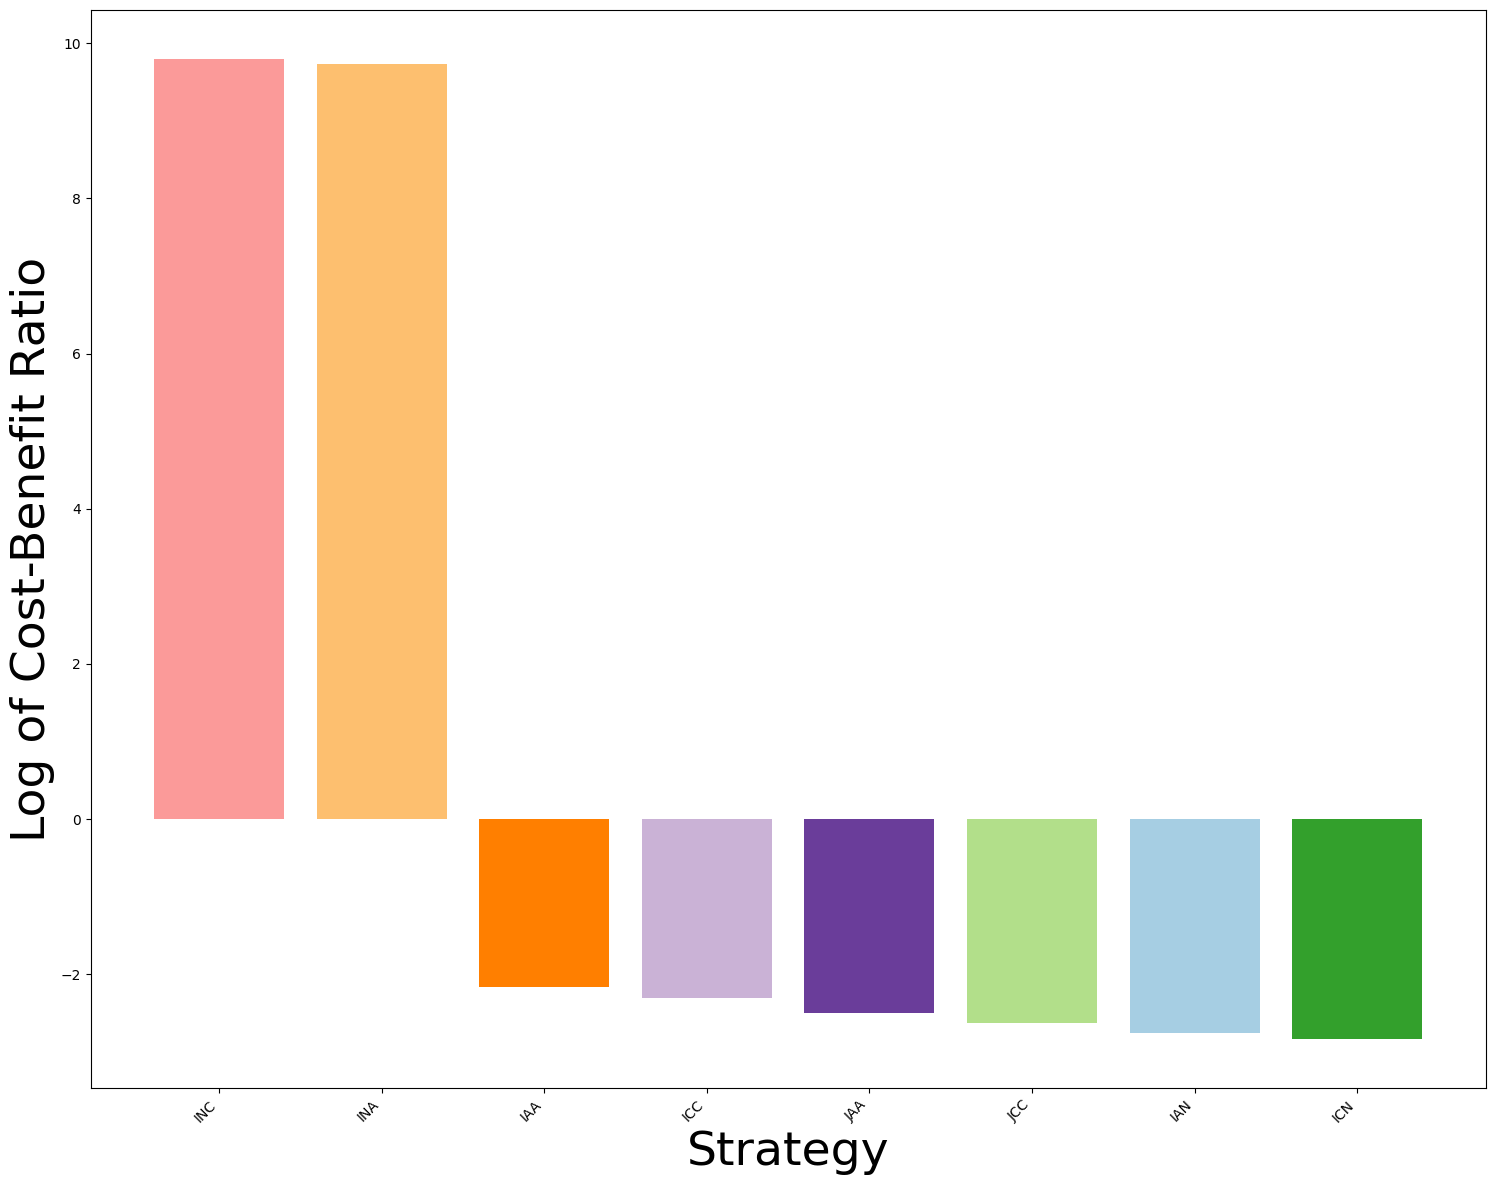

In [99]:
# Calculate cumulative percentage
df_pareto_sorted['cumulative_pct'] = df_pareto_sorted['log_of_cost_benefit_ratio'].cumsum() / df_pareto_sorted['log_of_cost_benefit_ratio'].sum() * 100

# Plotting
fig, ax = plt.subplots(figsize=(18, 14))
bar_positions = range(len(df_pareto_sorted))
bars = ax.bar(bar_positions, df_pareto_sorted['log_of_cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)])

# Set strategies as x-ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_pareto_sorted.index, rotation=45, ha="right")

# Plot the cumulative percentage line
# Note: We need to ensure the line starts at the first bar and ends at the last one accurately
#ax2 = ax.twinx()
#ax2.plot(bar_positions, df_pareto_sorted['cumulative_pct'], color='black', marker='o', linestyle='-', linewidth=2, ms=10)

# Labeling
ax.set_xlabel('Strategy', fontsize=34)
ax.set_ylabel('Log of Cost-Benefit Ratio', fontsize=34)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=34)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30)  
ax2.tick_params(axis='y', labelsize=30)  

plt.grid(True)
plt.tight_layout()
plt.show()
